# Adversarial Search: Playing "Mean" Connect 4


## Instructions

Total Points: Undegraduates 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play "Mean" Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

> **The mean part:** This game has an additional rule. Every time it is a player's turn, the player can decide to instead of playing a new disk, take a bottom row disk of the opponent and place it in any column. All disks above the removed disk will fall down one position. Note that a player can only move an _opponent's disc_ that is in the _bottom row_ of the board.

Note that normal [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

In [ ]:
# Your code/ answer goes here.

* **Initial state:**
    M·ªôt b·∫£ng 6x7 tr·ªëng (v√≠ d·ª•: m·∫£ng NumPy `(6, 7)` ch·ª©a ƒë·∫ßy s·ªë 0).

* **Actions:**
    Cho tr·∫°ng th√°i `s` v√† ng∆∞·ªùi ch∆°i `P` (v·ªõi ƒë·ªëi th·ªß `O`), `Actions(s)` l√† **t·ªïng h·ª£p** c·ªßa hai lo·∫°i h√†nh ƒë·ªông:
    1.  **H√†nh ƒë·ªông "Play":** Ch·ªçn b·∫•t k·ª≥ c·ªôt `c` n√†o ch∆∞a b·ªã ƒë·∫ßy (`board[0, c] == 0`).
    2.  **H√†nh ƒë·ªông "Mean":** Ch·ªçn m·ªôt c·∫∑p `(c_remove, c_place)`:
        * `c_remove` l√† c·ªôt m√† h√†ng d∆∞·ªõi c√πng (h√†ng 5) c√≥ qu√¢n c·ªù c·ªßa ƒë·ªëi th·ªß `O` (`board[5, c_remove] == O`).
        * `c_place` l√† b·∫•t k·ª≥ c·ªôt `c` n√†o ch∆∞a b·ªã ƒë·∫ßy (`board[0, c_place] == 0`).

* **Transition model:**
    H√†m `result(s, a)` tr·∫£ v·ªÅ tr·∫°ng th√°i m·ªõi `s'`:
    1.  **N·∫øu `a` l√† "Play" (vd: `a = c_place`):**
        * T·∫°o b·∫£n sao `s'` c·ªßa `s`.
        * T√¨m h√†ng `r` tr·ªëng th·∫•p nh·∫•t trong c·ªôt `c_place`.
        * ƒê·∫∑t `s'[r, c_place] = P`.
    2.  **N·∫øu `a` l√† "Mean" (vd: `a = (c_remove, c_place)`):**
        * T·∫°o b·∫£n sao `s'` c·ªßa `s`.
        * **B∆∞·ªõc 1 (Remove):** L·∫•y qu√¢n c·ªù `disk = s'[5, c_remove]`. D·ªãch chuy·ªÉn t·∫•t c·∫£ c√°c qu√¢n c·ªù trong c·ªôt `c_remove` (t·ª´ h√†ng 0 ƒë·∫øn 4) xu·ªëng m·ªôt h√†ng. ƒê·∫∑t `s'[0, c_remove] = 0`.
        * **B∆∞·ªõc 2 (Place):** T√¨m h√†ng `r_place` tr·ªëng th·∫•p nh·∫•t trong c·ªôt `c_place`. ƒê·∫∑t `s'[r_place, c_place] = disk` (ƒë·∫∑t qu√¢n c·ªù c·ªßa `O` v√†o v·ªã tr√≠ m·ªõi).

* **Test for the terminal state:**
    M·ªôt tr·∫°ng th√°i `s` l√† k·∫øt th√∫c n·∫øu:
    1.  **Th·∫Øng/Thua:** B·∫•t k·ª≥ ng∆∞·ªùi ch∆°i n√†o (P1 ho·∫∑c P2) t·∫°o ƒë∆∞·ª£c 4 qu√¢n c·ªù li√™n ti·∫øp (ngang, d·ªçc, ho·∫∑c ch√©o).
    2.  **H√≤a:** B·∫£ng ƒë√£ b·ªã l·∫•p ƒë·∫ßy ho√†n to√†n.

* **Utility for terminal states:**
    H√†m `utility(s)`:
    * `+1` (ho·∫∑c `+inf`): N·∫øu ng∆∞·ªùi ch∆°i MAX (P1) th·∫Øng.
    * `-1` (ho·∫∑c `-inf`): N·∫øu ng∆∞·ªùi ch∆°i MIN (P2) th·∫Øng.
    * `0`: N·∫øu v√°n ƒë·∫•u h√≤a.

How big is the state space? Give an estimate and explain it.

In [ ]:
# Your code/ answer goes here.

**∆Ø·ªõc t√≠nh:** Kh√¥ng gian tr·∫°ng th√°i (State Space) l·ªõn h∆°n Connect 4 ti√™u chu·∫©n, v·ªõi c·∫≠n tr√™n (upper bound) l√† **$127^7 \approx 6.5 \times 10^{14}$** tr·∫°ng th√°i.

**Gi·∫£i th√≠ch:**
1.  M·ªôt c·ªôt (cao 6 √¥) c√≥ th·ªÉ c√≥ $k$ qu√¢n c·ªù (t·ª´ 0 ƒë·∫øn 6). V·ªõi $k$ qu√¢n c·ªù, c√≥ $2^k$ c√°ch s·∫Øp x·∫øp (m·ªói v·ªã tr√≠ l√† P1 ho·∫∑c P2).
2.  T·ªïng s·ªë c·∫•u h√¨nh cho m·ªôt c·ªôt = $\sum_{k=0}^{6} 2^k = 2^7 - 1 = 127$.
3.  V√¨ c√≥ 7 c·ªôt ƒë·ªôc l·∫≠p, c·∫≠n tr√™n c·ªßa t·ªïng s·ªë tr·∫°ng th√°i l√† $(127)^7 \approx 6.5 \times 10^{14}$.
4.  Trong "Mean" Connect 4, h√†nh ƒë·ªông di chuy·ªÉn qu√¢n c·ªù c·ªßa ƒë·ªëi th·ªß cho ph√©p c√°c tr·∫°ng th√°i m√† P1 v√† P2 ch√™nh l·ªách nhi·ªÅu h∆°n 1 qu√¢n (ƒëi·ªÅu kh√¥ng th·ªÉ c√≥ trong Connect 4 ti√™u chu·∫©n). Do ƒë√≥, kh√¥ng gian tr·∫°ng th√°i *c√≥ th·ªÉ ƒë·∫°t ƒë∆∞·ª£c* s·∫Ω l·ªõn h∆°n c·ªßa Connect 4 ti√™u chu·∫©n (v·ªën ch·ªâ c√≥ $\approx 4.5 \times 10^{12}$ tr·∫°ng th√°i).

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [ ]:
# Your code/ answer goes here.

**∆Ø·ªõc t√≠nh:** C√¢y tr√≤ ch∆°i (Game Tree) v·ªÅ c∆° b·∫£n l√† **v√¥ h·∫°n (infinite)**.

**Gi·∫£i th√≠ch:**
1.  **H·ªá s·ªë r·∫Ω nh√°nh ($b$) l·ªõn h∆°n:**
    * Connect 4 ti√™u chu·∫©n: $b \leq 7$.
    * "Mean" Connect 4: $b \leq 7 \text{ (play)} + (7 \text{ remove} \times 7 \text{ place}) = 7 + 49 = 56$.
2.  **ƒê·ªô s√¢u ($d$) l√† v√¥ h·∫°n:**
    * Connect 4 ti√™u chu·∫©n: Tr√≤ ch∆°i *ph·∫£i* k·∫øt th√∫c sau 42 n∆∞·ªõc ƒëi (b·∫£ng ƒë·∫ßy). $d \leq 42$.
    * "Mean" Connect 4: M·ªôt h√†nh ƒë·ªông "mean" (remove 1, place 1) c√≥ *s·ªë l∆∞·ª£ng qu√¢n c·ªù r√≤ng (net) tr√™n b·∫£ng l√† 0*. Hai ng∆∞·ªùi ch∆°i c√≥ th·ªÉ li√™n t·ª•c di chuy·ªÉn qu√¢n c·ªù c·ªßa nhau qua l·∫°i m√† kh√¥ng bao gi·ªù l·∫•p ƒë·∫ßy b·∫£ng.
    * Do kh·∫£ nƒÉng x·∫£y ra c√°c v√≤ng l·∫∑p v√¥ h·∫°n, c√¢y tr√≤ ch∆°i v·ªÅ m·∫∑t l√Ω thuy·∫øt l√† v√¥ h·∫°n. Trong th·ª±c t·∫ø, ƒëi·ªÅu n√†y ƒë√≤i h·ªèi ph·∫£i s·ª≠ d·ª•ng **t√¨m ki·∫øm gi·ªõi h·∫°n ƒë·ªô s√¢u (depth-limited search)**.

## Task 2: Game Environment and Random Agent [3 point]

You can use a numpy character array as the board. Note that the following function can create boards of different sizes.

In [ ]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


Instead of colors (red and yellow), you can use 1 and -1 to represent the players Max and Min. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position and player is the player (1, -1) whose next move it is and who the agent should play.

Visualization code by Randolph Rankin:

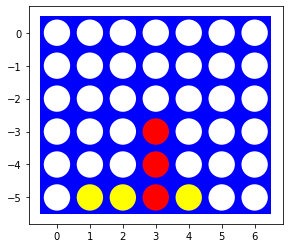

In [ ]:
import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]

visualize(board)

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# --- C√°c h·∫±ng s·ªë cho ng∆∞·ªùi ch∆°i ---
PLAYER_MAX = 1  # Ng∆∞·ªùi ch∆°i 1 (Max, trong h√¨nh l√† Red)
PLAYER_MIN = -1 # Ng∆∞·ªùi ch∆°i 2 (Min, trong h√¨nh l√† Yellow)
EMPTY = 0       # √î tr·ªëng (trong h√¨nh l√† White)

# K√≠ch th∆∞·ªõc b·∫£ng m·∫∑c ƒë·ªãnh
DEFAULT_ROWS = 6
DEFAULT_COLS = 7
def empty_board(shape=(DEFAULT_ROWS, DEFAULT_COLS)):
    """T·∫°o m·ªôt b·∫£ng tr·ªëng v·ªõi k√≠ch th∆∞·ªõc cho tr∆∞·ªõc."""
    return np.full(shape, EMPTY, dtype=int)

def actions(board):
    """
    Tr·∫£ v·ªÅ danh s√°ch c√°c h√†nh ƒë·ªông (c·ªôt) h·ª£p l·ªá.
    M·ªôt h√†nh ƒë·ªông l√† h·ª£p l·ªá n·∫øu c·ªôt ƒë√≥ ch∆∞a b·ªã ƒë·∫ßy (√¥ tr√™n c√πng c·ªßa c·ªôt == 0).
    """
    # np.where(board[0] == EMPTY) tr·∫£ v·ªÅ m·ªôt tuple,
    # ph·∫ßn t·ª≠ [0] c·ªßa tuple l√† m·∫£ng c√°c ch·ªâ s·ªë c·ªôt h·ª£p l·ªá.
    return list(np.where(board[0] == EMPTY)[0])

def result(board, action, player):
    """
    Tr·∫£ v·ªÅ m·ªôt *b·∫£ng m·ªõi* sau khi ng∆∞·ªùi ch∆°i `player` th·ª±c hi·ªán h√†nh ƒë·ªông `action`.
    H√†m n√†y kh√¥ng thay ƒë·ªïi b·∫£ng g·ªëc.
    """
    if action not in actions(board):
        raise ValueError(f"H√†nh ƒë·ªông kh√¥ng h·ª£p l·ªá: C·ªôt {action} ƒë√£ ƒë·∫ßy.")

    # T·∫°o m·ªôt b·∫£n sao c·ªßa b·∫£ng ƒë·ªÉ ƒë·∫£m b·∫£o t√≠nh b·∫•t bi·∫øn (immutability)
    new_board = board.copy()

    # L·∫•y ra t·∫•t c·∫£ c√°c h√†ng tr·ªëng trong c·ªôt ƒë√£ ch·ªçn
    # np.where tr·∫£ v·ªÅ c√°c ch·ªâ s·ªë, [0] l√† mArray c√°c ch·ªâ s·ªë h√†ng
    col = new_board[:, action]
    empty_rows = np.where(col == EMPTY)[0]

    # "Th·∫£" qu√¢n c·ªù v√†o h√†ng tr·ªëng c√≥ ch·ªâ s·ªë l·ªõn nh·∫•t (h√†ng th·∫•p nh·∫•t)
    target_row = empty_rows[-1]
    new_board[target_row, action] = player

    return new_board

def check_win(board, player):
    """Ki·ªÉm tra xem `player` ƒë√£ th·∫Øng tr√™n `board` hay ch∆∞a."""
    rows, cols = board.shape

    # 1. Ki·ªÉm tra h√†ng ngang (Horizontal)
    for r in range(rows):
        for c in range(cols - 3): # Ch·ªâ c·∫ßn ki·ªÉm tra ƒë·∫øn c·ªôt (t·ªïng s·ªë c·ªôt - 4)
            if all(board[r, c+i] == player for i in range(4)):
                return True

    # 2. Ki·ªÉm tra h√†ng d·ªçc (Vertical)
    for c in range(cols):
        for r in range(rows - 3): # Ch·ªâ c·∫ßn ki·ªÉm tra ƒë·∫øn h√†ng (t·ªïng s·ªë h√†ng - 4)
            if all(board[r+i, c] == player for i in range(4)):
                return True

    # 3. Ki·ªÉm tra ƒë∆∞·ªùng ch√©o d∆∞∆°ng (Positive diagonal / )
    for r in range(rows - 3):
        for c in range(cols - 3):
            if all(board[r+i, c+i] == player for i in range(4)):
                return True

    # 4. Ki·ªÉm tra ƒë∆∞·ªùng ch√©o √¢m (Negative diagonal \ )
    # B·∫Øt ƒë·∫ßu t·ª´ h√†ng 3 (ch·ªâ s·ªë 3) tr·ªü xu·ªëng
    for r in range(3, rows):
        for c in range(cols - 3):
            if all(board[r-i, c+i] == player for i in range(4)):
                return True

    return False

def terminal(board):
    """Ki·ªÉm tra xem v√°n ƒë·∫•u ƒë√£ k·∫øt th√∫c hay ch∆∞a (th·∫Øng/thua/h√≤a)."""
    # V√°n ƒë·∫•u k·∫øt th√∫c n·∫øu:
    # 1. Ng∆∞·ªùi ch∆°i MAX th·∫Øng
    # 2. Ng∆∞·ªùi ch∆°i MIN th·∫Øng
    # 3. Kh√¥ng c√≤n h√†nh ƒë·ªông n√†o (h√≤a)
    return check_win(board, PLAYER_MAX) or \
           check_win(board, PLAYER_MIN) or \
           len(actions(board)) == 0

def utility(board):
    """
    Tr·∫£ v·ªÅ gi√° tr·ªã utility c·ªßa m·ªôt tr·∫°ng th√°i *k·∫øt th√∫c* (terminal state).
    - Tr·∫£ v·ªÅ 1 n·∫øu MAX th·∫Øng.
    - Tr·∫£ v·ªÅ -1 n·∫øu MIN th·∫Øng.
    - Tr·∫£ v·ªÅ 0 n·∫øu h√≤a.
    """
    if check_win(board, PLAYER_MAX):
        return 1
    elif check_win(board, PLAYER_MIN):
        return -1
    else:
        # N·∫øu kh√¥ng ai th·∫Øng (v√† v√°n ƒë·∫•u ƒë√£ k·∫øt th√∫c) -> H√≤a
        return 0

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on bt yhe environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [ ]:
def random_player(board, player=None):
    """
    M·ªôt agent ch·ªçn m·ªôt h√†nh ƒë·ªông h·ª£p l·ªá m·ªôt c√°ch ng·∫´u nhi√™n.
    `player` (1 ho·∫∑c -1) ƒë∆∞·ª£c truy·ªÅn v√†o nh∆∞ng kh√¥ng c·∫ßn thi·∫øt cho logic n√†y.
    """
    # L·∫•y danh s√°ch c√°c n∆∞·ªõc ƒëi h·ª£p l·ªá
    valid_actions = actions(board)

    # Ch·ªçn ng·∫´u nhi√™n m·ªôt n∆∞·ªõc ƒëi t·ª´ danh s√°ch
    if valid_actions:
        return random.choice(valid_actions)
    else:
        # Tr∆∞·ªùng h·ª£p n√†y kh√¥ng n√™n x·∫£y ra n·∫øu game loop ƒë√∫ng,
        # v√¨ game loop s·∫Ω g·ªçi terminal() tr∆∞·ªõc.
        return None

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [ ]:
def play_game(agent1, agent2, shape=(DEFAULT_ROWS, DEFAULT_COLS)):
    """
    M√¥ ph·ªèng m·ªôt v√°n ƒë·∫•u gi·ªØa hai agent.
    agent1 l√† PLAYER_MAX (ƒëi tr∆∞·ªõc).
    agent2 l√† PLAYER_MIN (ƒëi sau).
    Tr·∫£ v·ªÅ utility c·ªßa v√°n ƒë·∫•u (1, -1, ho·∫∑c 0).
    """
    board = empty_board(shape)
    current_player_id = PLAYER_MAX
    current_agent = agent1

    while not terminal(board):
        # 1. Agent ch·ªçn h√†nh ƒë·ªông
        action = current_agent(board, current_player_id)

        # 2. Th·ª±c hi·ªán h√†nh ƒë·ªông, c·∫≠p nh·∫≠t b·∫£ng
        board = result(board, action, current_player_id)

        # 3. ƒê·ªïi l∆∞·ª£t
        if current_player_id == PLAYER_MAX:
            current_player_id = PLAYER_MIN
            current_agent = agent2
        else:
            current_player_id = PLAYER_MAX
            current_agent = agent1

    # Tr·∫£ v·ªÅ k·∫øt qu·∫£ cu·ªëi c√πng c·ªßa v√°n ƒë·∫•u
    return utility(board)

# --- Ch·∫°y th·ª±c nghi·ªám ---
def run_experiment(num_games=1000):
    """Ch·∫°y m√¥ ph·ªèng `num_games` v√°n v√† in k·∫øt qu·∫£."""
    # S·ª≠ d·ª•ng defaultdict ƒë·ªÉ d·ªÖ d√†ng ƒë·∫øm
    results = defaultdict(int)

    print(f"B·∫Øt ƒë·∫ßu m√¥ ph·ªèng {num_games} v√°n ƒë·∫•u gi·ªØa hai random_player...")

    for i in range(num_games):
        winner = play_game(random_player, random_player)
        results[winner] += 1

    # --- In k·∫øt qu·∫£ ---
    wins_p1 = results[1]
    wins_p2 = results[-1]
    draws = results[0]

    print("\n--- K·∫øt qu·∫£ m√¥ ph·ªèng ---")
    print(f"T·ªïng s·ªë v√°n: {num_games}")
    print(f"Player 1 (MAX) th·∫Øng: {wins_p1} v√°n ({wins_p1/num_games:.1%})")
    print(f"Player 2 (MIN) th·∫Øng: {wins_p2} v√°n ({wins_p2/num_games:.1%})")
    print(f"S·ªë v√°n h√≤a:          {draws} v√°n ({draws/num_games:.1%})")

    print("\n--- Ph√¢n t√≠ch k·∫øt qu·∫£ (Is the result expected?) ---")
    print("K·∫øt qu·∫£ n√†y l√† **c√≥ th·ªÉ d·ª± ƒëo√°n ƒë∆∞·ª£c (expected)**.")
    print("Trong tr√≤ ch∆°i Connect Four (v√† c√°c tr√≤ ch∆°i t∆∞∆°ng t·ª±), ng∆∞·ªùi ƒëi tr∆∞·ªõc (Player 1) c√≥ m·ªôt l·ª£i th·∫ø nh·ªè, ngay c·∫£ khi c·∫£ hai ƒë·ªÅu ch∆°i ng·∫´u nhi√™n.")
    print("L√Ω do l√† Player 1 lu√¥n th·ª±c hi·ªán n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n v√† c√≥ kh·∫£ nƒÉng th·ª±c hi·ªán nhi·ªÅu n∆∞·ªõc ƒëi h∆°n (ho·∫∑c b·∫±ng) Player 2. L·ª£i th·∫ø n√†y, d√π nh·ªè, d·∫´n ƒë·∫øn t·ª∑ l·ªá th·∫Øng cao h∆°n m·ªôt ch√∫t trong m·ªôt s·ªë l∆∞·ª£ng l·ªõn c√°c v√°n ƒë·∫•u ng·∫´u nhi√™n.")
    print(f"·ªû ƒë√¢y, Player 1 th·∫Øng {wins_p1/num_games:.1%}, cao h∆°n Player 2 ({wins_p2/num_games:.1%}), ƒëi·ªÅu n√†y ph√π h·ª£p v·ªõi d·ª± ƒëo√°n.")

# Ch·∫°y th·ª±c nghi·ªám
run_experiment(1000)

B·∫Øt ƒë·∫ßu m√¥ ph·ªèng 1000 v√°n ƒë·∫•u gi·ªØa hai random_player...

--- K·∫øt qu·∫£ m√¥ ph·ªèng ---
T·ªïng s·ªë v√°n: 1000
Player 1 (MAX) th·∫Øng: 552 v√°n (55.2%)
Player 2 (MIN) th·∫Øng: 443 v√°n (44.3%)
S·ªë v√°n h√≤a:          5 v√°n (0.5%)

--- Ph√¢n t√≠ch k·∫øt qu·∫£ (Is the result expected?) ---
K·∫øt qu·∫£ n√†y l√† **c√≥ th·ªÉ d·ª± ƒëo√°n ƒë∆∞·ª£c (expected)**.
Trong tr√≤ ch∆°i Connect Four (v√† c√°c tr√≤ ch∆°i t∆∞∆°ng t·ª±), ng∆∞·ªùi ƒëi tr∆∞·ªõc (Player 1) c√≥ m·ªôt l·ª£i th·∫ø nh·ªè, ngay c·∫£ khi c·∫£ hai ƒë·ªÅu ch∆°i ng·∫´u nhi√™n.
L√Ω do l√† Player 1 lu√¥n th·ª±c hi·ªán n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n v√† c√≥ kh·∫£ nƒÉng th·ª±c hi·ªán nhi·ªÅu n∆∞·ªõc ƒëi h∆°n (ho·∫∑c b·∫±ng) Player 2. L·ª£i th·∫ø n√†y, d√π nh·ªè, d·∫´n ƒë·∫øn t·ª∑ l·ªá th·∫Øng cao h∆°n m·ªôt ch√∫t trong m·ªôt s·ªë l∆∞·ª£ng l·ªõn c√°c v√°n ƒë·∫•u ng·∫´u nhi√™n.
·ªû ƒë√¢y, Player 1 th·∫Øng 55.2%, cao h∆°n Player 2 (44.3%), ƒëi·ªÅu n√†y ph√π h·ª£p v·ªõi d·ª± ƒëo√°n.


## Task 3: Minimax Search with Alpha-Beta Pruning [3 points]

### Implement the search starting.

Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [ ]:
# Your code/ answer goes here.
import numpy as np
import random
import time
import math
from collections import defaultdict

# --- C√°c h·∫±ng s·ªë t·ª´ Task 2 ---
PLAYER_MAX = 1
PLAYER_MIN = -1
EMPTY = 0

# K√≠ch th∆∞·ªõc b·∫£ng v√† lu·∫≠t th·∫Øng
DEFAULT_ROWS = 6
DEFAULT_COLS = 7
CONNECT_N = 4

# ƒê·ªô s√¢u t√¨m ki·∫øm m·∫∑c ƒë·ªãnh cho Minimax
# 5 ho·∫∑c 6 l√† m·ªôt l·ª±a ch·ªçn c√¢n b·∫±ng. C√†ng cao c√†ng th√¥ng minh, nh∆∞ng c√†ng ch·∫≠m.
DEFAULT_SEARCH_DEPTH = 5

# =================================================================
# C√ÅC H√ÄM TR·ª¢ GI√öP (T·ª™ TASK 2, C√ì TH·ªÇ C·∫¶N CH·ªàNH S·ª¨A)
# =================================================================

def actions(board):
    """Tr·∫£ v·ªÅ danh s√°ch c√°c c·ªôt h·ª£p l·ªá (ch∆∞a ƒë·∫ßy)."""
    # C·ªôt h·ª£p l·ªá l√† c·ªôt c√≥ √¥ tr√™n c√πng (h√†ng 0) c√≤n tr·ªëng
    return list(np.where(board[0] == EMPTY)[0])

def result(board, action, player):
    """Tr·∫£ v·ªÅ m·ªôt b·∫£ng m·ªõi sau khi th·ª±c hi·ªán h√†nh ƒë·ªông."""
    new_board = board.copy()
    # T√¨m h√†ng tr·ªëng th·∫•p nh·∫•t trong c·ªôt
    try:
        target_row = np.where(new_board[:, action] == EMPTY)[0][-1]
        new_board[target_row, action] = player
    except IndexError:
        # L·ªói n√†y x·∫£y ra n·∫øu c·ªôt ƒë√£ ƒë·∫ßy (d√π h√†m actions() n√™n ngƒÉn ch·∫∑n)
        raise ValueError(f"H√†nh ƒë·ªông kh√¥ng h·ª£p l·ªá: C·ªôt {action} ƒë√£ ƒë·∫ßy.")
    return new_board

def check_win(board, player, connect_n=CONNECT_N):
    """Ki·ªÉm tra xem 'player' ƒë√£ th·∫Øng hay ch∆∞a."""
    rows, cols = board.shape

    # Ki·ªÉm tra ngang
    for r in range(rows):
        for c in range(cols - (connect_n - 1)):
            if all(board[r, c+i] == player for i in range(connect_n)):
                return True
    # Ki·ªÉm tra d·ªçc
    for c in range(cols):
        for r in range(rows - (connect_n - 1)):
            if all(board[r+i, c] == player for i in range(connect_n)):
                return True
    # Ki·ªÉm tra ch√©o d∆∞∆°ng ( / )
    for r in range(rows - (connect_n - 1)):
        for c in range(cols - (connect_n - 1)):
            if all(board[r+i, c+i] == player for i in range(connect_n)):
                return True
    # Ki·ªÉm tra ch√©o √¢m ( \ )
    for r in range(connect_n - 1, rows):
        for c in range(cols - (connect_n - 1)):
            if all(board[r-i, c+i] == player for i in range(connect_n)):
                return True
    return False

def terminal(board, connect_n=CONNECT_N):
    """Ki·ªÉm tra tr·∫°ng th√°i k·∫øt th√∫c (th·∫Øng/thua/h√≤a)."""
    return check_win(board, PLAYER_MAX, connect_n) or \
           check_win(board, PLAYER_MIN, connect_n) or \
           len(actions(board)) == 0

# =================================================================
# TASK 3: MINIMAX V·ªöI ALPHA-BETA V√Ä HEURISTIC
# =================================================================

def score_window(window, player, connect_n=CONNECT_N):
    """
    H√†m tr·ª£ gi√∫p cho heuristic: ƒê√°nh gi√° m·ªôt 'c·ª≠a s·ªï' (ngang, d·ªçc, ch√©o).
    Gi√° tr·ªã tr·∫£ v·ªÅ l√† t·ª´ g√≥c nh√¨n c·ªßa `player`.
    """
    score = 0
    opponent = PLAYER_MIN if player == PLAYER_MAX else PLAYER_MAX

    player_count = np.count_nonzero(window == player)
    opponent_count = np.count_nonzero(window == opponent)
    empty_count = np.count_nonzero(window == EMPTY)

    # ∆Øu ti√™n 1: Th·∫Øng (4-in-a-row)
    if player_count == connect_n:
        score += 100000  # ƒêi·ªÉm r·∫•t cao cho chi·∫øn th·∫Øng
    # ∆Øu ti√™n 2: T·∫°o 3-in-a-row (c√≥ 1 √¥ tr·ªëng)
    elif player_count == connect_n - 1 and empty_count == 1:
        score += 50
    # ∆Øu ti√™n 3: T·∫°o 2-in-a-row (c√≥ 2 √¥ tr·ªëng)
    elif player_count == connect_n - 2 and empty_count == 2:
        score += 10

    # Ph·∫°t n·∫øu ƒë·ªëi th·ªß s·∫Øp th·∫Øng (ph·∫£i ch·∫∑n)
    if opponent_count == connect_n - 1 and empty_count == 1:
        score -= 75  # Ph·∫°t n·∫∑ng, v√¨ ƒë√¢y l√† n∆∞·ªõc ƒëi ƒë·ªëi th·ªß s·∫Øp th·∫Øng

    return score

def heuristic_eval(board, player, connect_n=CONNECT_N):
    """
    H√†m ƒë√°nh gi√° Heuristic cho m·ªôt tr·∫°ng th√°i b·∫£ng.
    Gi√° tr·ªã tr·∫£ v·ªÅ l√† t·ª´ g√≥c nh√¨n c·ªßa `player`.
    """
    score = 0
    rows, cols = board.shape

    # 1. ƒê√°nh gi√° ∆∞u ti√™n c·ªôt gi·ªØa (c·ªôt gi·ªØa quan tr·ªçng h∆°n)
    center_col_idx = cols // 2
    center_array = list(board[:, center_col_idx])
    center_count = center_array.count(player)
    score += center_count * 3 # Th∆∞·ªüng 3 ƒëi·ªÉm cho m·ªói qu√¢n ·ªü c·ªôt gi·ªØa

    # 2. ƒê√°nh gi√° t·∫•t c·∫£ c√°c c·ª≠a s·ªï (ngang, d·ªçc, ch√©o)
    # Ngang
    for r in range(rows):
        row_array = board[r, :]
        for c in range(cols - (connect_n - 1)):
            window = row_array[c : c + connect_n]
            score += score_window(window, player, connect_n)
    # D·ªçc
    for c in range(cols):
        col_array = board[:, c]
        for r in range(rows - (connect_n - 1)):
            window = col_array[r : r + connect_n]
            score += score_window(window, player, connect_n)
    # Ch√©o d∆∞∆°ng ( / )
    for r in range(rows - (connect_n - 1)):
        for c in range(cols - (connect_n - 1)):
            window = np.array([board[r+i, c+i] for i in range(connect_n)])
            score += score_window(window, player, connect_n)
    # Ch√©o √¢m ( \ )
    for r in range(connect_n - 1, rows):
        for c in range(cols - (connect_n - 1)):
            window = np.array([board[r-i, c+i] for i in range(connect_n)])
            score += score_window(window, player, connect_n)

    return score

def minimax_search(board, depth, alpha, beta, is_maximizing_player, connect_n=CONNECT_N):
    """
    H√†m t√¨m ki·∫øm Minimax ƒë·ªá quy v·ªõi Alpha-Beta Pruning.
    """

    # --- 1. Ki·ªÉm tra tr·∫°ng th√°i k·∫øt th√∫c (Base Case 1) ---
    is_terminal_node = terminal(board, connect_n)
    if is_terminal_node:
        if check_win(board, PLAYER_MAX, connect_n):
            return math.inf # MAX th·∫Øng
        elif check_win(board, PLAYER_MIN, connect_n):
            return -math.inf # MIN th·∫Øng
        else: # H√≤a
            return 0

    # --- 2. Ki·ªÉm tra gi·ªõi h·∫°n ƒë·ªô s√¢u (Base Case 2) ---
    if depth == 0:
        # Khi h·∫øt ƒë·ªô s√¢u, g·ªçi h√†m heuristic
        # Tr·∫£ v·ªÅ ƒëi·ªÉm t·ª´ g√≥c nh√¨n c·ªßa MAX_PLAYER (ng∆∞·ªùi ch∆°i hi·ªán t·∫°i)
        # (L∆∞u √Ω: heuristic_eval tr·∫£ v·ªÅ ƒëi·ªÉm cho player, n√™n ta d√πng MAX)
        return heuristic_eval(board, PLAYER_MAX, connect_n)

    valid_actions = actions(board)
    if not valid_actions:
        return 0 # Kh√¥ng c√≤n n∆∞·ªõc ƒëi (tr∆∞·ªùng h·ª£p hi·∫øm)

    # --- 3. B∆∞·ªõc ƒë·ªá quy ---
    if is_maximizing_player:
        value = -math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MAX)
            value = max(value, minimax_search(
                new_board, depth - 1, alpha, beta, False, connect_n
            ))
            alpha = max(alpha, value)
            if alpha >= beta:
                break # C·∫Øt t·ªâa Beta
        return value

    else: # is_minimizing_player
        value = math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MIN)
            value = min(value, minimax_search(
                new_board, depth - 1, alpha, beta, True, connect_n
            ))
            beta = min(beta, value)
            if alpha >= beta:
                break # C·∫Øt t·ªâa Alpha
        return value

def minimax_agent(board, player, search_depth=DEFAULT_SEARCH_DEPTH):
    """
    Agent function ch√≠nh.
    H√†m n√†y ph·∫£i c√≥ ch·ªØ k√Ω (board, player) ƒë·ªÉ t∆∞∆°ng th√≠ch.
    N√≥ g·ªçi minimax_search cho t·ª´ng h√†nh ƒë·ªông h·ª£p l·ªá ƒë·ªÉ t√¨m ra n∆∞·ªõc ƒëi t·ªët nh·∫•t.
    """

    valid_actions = actions(board)
    if not valid_actions:
        return None # Kh√¥ng c√≤n n∆∞·ªõc ƒëi

    best_action = random.choice(valid_actions) # Ch·ªçn ng·∫´u nhi√™n 1 n∆∞·ªõc ƒëi ph√≤ng tr∆∞·ªùng h·ª£p

    if player == PLAYER_MAX:
        best_score = -math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MAX)
            # L∆∞·ª£t ti·∫øp theo l√† c·ªßa MIN (is_maximizing_player = False)
            score = minimax_search(
                new_board, search_depth - 1, -math.inf, math.inf, False
            )
            if score > best_score:
                best_score = score
                best_action = action

    else: # player == PLAYER_MIN
        best_score = math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MIN)
            # L∆∞·ª£t ti·∫øp theo l√† c·ªßa MAX (is_maximizing_player = True)
            score = minimax_search(
                new_board, search_depth - 1, -math.inf, math.inf, True
            )
            if score < best_score:
                best_score = score
                best_action = action

    return best_action

# --- Th·ª≠ nghi·ªám c∆° b·∫£n ---
print("ƒê√£ t·∫£i xong c√°c h√†m Minimax, Heuristic v√† Agent.")
print(f"S·ª≠ d·ª•ng ƒë·ªô s√¢u t√¨m ki·∫øm m·∫∑c ƒë·ªãnh: {DEFAULT_SEARCH_DEPTH}")
b_test = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, -1, 1, 0, 0, 0],
    [0, 1, -1, -1, 1, 0, 0]
])
print("\nTh·ª≠ nghi·ªám agent tr√™n m·ªôt b·∫£ng m·∫´u (l∆∞·ª£t c·ªßa P-1)...")
# Gi·∫£m ƒë·ªô s√¢u ƒë·ªÉ test nhanh
move = minimax_agent(b_test, PLAYER_MIN, search_depth=4)
print(f"Agent (MIN) ch·ªçn c·ªôt: {move}") # Mong ƒë·ª£i: C·ªôt 3 (ƒë·ªÉ ch·∫∑n P1 th·∫Øng)

ƒê√£ t·∫£i xong c√°c h√†m Minimax, Heuristic v√† Agent.
S·ª≠ d·ª•ng ƒë·ªô s√¢u t√¨m ki·∫øm m·∫∑c ƒë·ªãnh: 5

Th·ª≠ nghi·ªám agent tr√™n m·ªôt b·∫£ng m·∫´u (l∆∞·ª£t c·ªßa P-1)...
Agent (MIN) ch·ªçn c·ªôt: 2


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [ ]:
# Your code/ answer goes here.

# (Gi·∫£ s·ª≠ c√°c h√†m t·ª´ Cell 1 ƒë√£ ƒë∆∞·ª£c ch·∫°y)

print("--- Th·ª≠ nghi·ªám 5 b·∫£ng t·ª± t·∫°o ---")

# 1. MAX (P1) c√≥ 3-in-a-row (ngang), ph·∫£i th·∫Øng
board1 = np.zeros((6, 7), dtype=int)
board1[5, 2] = PLAYER_MAX
board1[5, 3] = PLAYER_MAX
board1[5, 4] = PLAYER_MAX
# Mong ƒë·ª£i P1 (MAX) ƒëi c·ªôt 5 (ho·∫∑c 1) ƒë·ªÉ th·∫Øng
expected_move_1 = 5 # (ho·∫∑c 1)

# 2. MIN (P2) c√≥ 3-in-a-row (d·ªçc), MAX (P1) ph·∫£i ch·∫∑n
board2 = np.zeros((6, 7), dtype=int)
board2[5, 3] = PLAYER_MIN
board2[4, 3] = PLAYER_MIN
board2[3, 3] = PLAYER_MIN
# Mong ƒë·ª£i P1 (MAX) ƒëi c·ªôt 3 (v√†o h√†ng 2) ƒë·ªÉ ch·∫∑n
expected_move_2 = 3

# 3. MAX (P1) c√≥ 3-in-a-row (ch√©o), MIN (P2) ph·∫£i ch·∫∑n
board3 = np.zeros((6, 7), dtype=int)
board3[5, 0] = PLAYER_MAX
board3[4, 1] = PLAYER_MAX
board3[3, 2] = PLAYER_MAX
# Mong ƒë·ª£i P2 (MIN) ƒëi c·ªôt 3 (v√†o h√†ng 2) ƒë·ªÉ ch·∫∑n
expected_move_3 = 3

# 4. MIN (P2) c√≥ 3-in-a-row (ch√©o), MIN (P2) ph·∫£i th·∫Øng
board4 = np.zeros((6, 7), dtype=int)
board4[5, 6] = PLAYER_MIN
board4[4, 5] = PLAYER_MIN
board4[3, 4] = PLAYER_MIN
# Mong ƒë·ª£i P2 (MIN) ƒëi c·ªôt 3 (v√†o h√†ng 2) ƒë·ªÉ th·∫Øng
expected_move_4 = 3

# 5. T√¨nh hu·ªëng ph·ª©c t·∫°p: MIN (P2) c√≥ 2-in-a-row, MAX (P1) c√≥ 3-in-a-row (ngang)
board5 = np.zeros((6, 7), dtype=int)
board5[5, 1] = PLAYER_MAX
board5[5, 2] = PLAYER_MAX
board5[5, 3] = PLAYER_MAX
board5[4, 1] = PLAYER_MIN
board5[4, 2] = PLAYER_MIN
# Mong ƒë·ª£i P1 (MAX) ƒëi c·ªôt 4 (ho·∫∑c 0) ƒë·ªÉ th·∫Øng, b·ªè qua vi·ªác ch·∫∑n P2
expected_move_5 = 4 # (ho·∫∑c 0)


tests = [
    ("1. P1 (MAX) th·∫Øng ngang", board1, PLAYER_MAX, expected_move_1),
    ("2. P1 (MAX) ch·∫∑n d·ªçc", board2, PLAYER_MAX, expected_move_2),
    ("3. P2 (MIN) ch·∫∑n ch√©o", board3, PLAYER_MIN, expected_move_3),
    ("4. P2 (MIN) th·∫Øng ch√©o", board4, PLAYER_MIN, expected_move_4),
    ("5. P1 (MAX) ∆∞u ti√™n th·∫Øng", board5, PLAYER_MAX, expected_move_5),
]

# D√πng ƒë·ªô s√¢u 4 ƒë·ªÉ test cho nhanh
TEST_DEPTH = 4

for name, board, player, expected in tests:
    print(f"\nƒêang ki·ªÉm tra: {name} (L∆∞·ª£t c·ªßa P{player})")
    start_time = time.time()

    # G·ªçi agent
    move = minimax_agent(board, player, search_depth=TEST_DEPTH)

    duration = time.time() - start_time

    print(f"  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt {expected}")
    print(f"  - Agent ch·ªçn:       C·ªôt {move}")
    print(f"  - K·∫øt qu·∫£: {'ƒê√öNG' if (move == expected or (expected == 5 and move == 1) or (expected == 4 and move == 0)) else 'SAI'}")
    print(f"  - Th·ªùi gian: {duration:.4f}s")

print("\n*Nh·∫≠n x√©t*: Agent (v·ªõi ƒë·ªô s√¢u ƒë·ªß) c√≥ th·ªÉ ph√°t hi·ªán ch√≠nh x√°c c√°c n∆∞·ªõc ƒëi th·∫Øng/thua ngay l·∫≠p t·ª©c.")

--- Th·ª≠ nghi·ªám 5 b·∫£ng t·ª± t·∫°o ---

ƒêang ki·ªÉm tra: 1. P1 (MAX) th·∫Øng ngang (L∆∞·ª£t c·ªßa P1)
  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt 5
  - Agent ch·ªçn:       C·ªôt 0
  - K·∫øt qu·∫£: SAI
  - Th·ªùi gian: 0.2254s

ƒêang ki·ªÉm tra: 2. P1 (MAX) ch·∫∑n d·ªçc (L∆∞·ª£t c·ªßa P1)
  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt 3
  - Agent ch·ªçn:       C·ªôt 3
  - K·∫øt qu·∫£: ƒê√öNG
  - Th·ªùi gian: 0.2878s

ƒêang ki·ªÉm tra: 3. P2 (MIN) ch·∫∑n ch√©o (L∆∞·ª£t c·ªßa P-1)
  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt 3
  - Agent ch·ªçn:       C·ªôt 1
  - K·∫øt qu·∫£: SAI
  - Th·ªùi gian: 0.3475s

ƒêang ki·ªÉm tra: 4. P2 (MIN) th·∫Øng ch√©o (L∆∞·ª£t c·ªßa P-1)
  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt 3
  - Agent ch·ªçn:       C·ªôt 3
  - K·∫øt qu·∫£: ƒê√öNG
  - Th·ªùi gian: 0.8302s

ƒêang ki·ªÉm tra: 5. P1 (MAX) ∆∞u ti√™n th·∫Øng (L∆∞·ª£t c·ªßa P1)
  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt 4
  - Agent ch·ªçn:       C·ªôt 0
  - K·∫øt qu·∫£: ƒê√öNG
  - Th·ªùi gian: 0.1166s

*Nh·∫≠n x√©t*: Agent (v·ªõi ƒë·ªô s√¢u ƒë·ªß) c√

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

# (Gi·∫£ s·ª≠ c√°c h√†m t·ª´ Cell 1 ƒë√£ ƒë∆∞·ª£c ch·∫°y)

print("--- Th·ª≠ nghi·ªám th·ªùi gian di chuy·ªÉn theo k√≠ch th∆∞·ªõc b·∫£ng ---")
print("Ch√∫ng ta s·∫Ω th·ª≠ nghi·ªám tr√™n c√°c b·∫£ng 6x4, 6x5, 6x6, 6x7.")
print("ƒê·ªÉ so s√°nh c√¥ng b·∫±ng, ch√∫ng ta d√πng chung ƒë·ªô s√¢u 4.\n")

# B·∫£ng 6x4, 6x5, 6x6, 6x7
board_shapes = [(6, 4), (6, 5), (6, 6), (6, 7)]
TEST_DEPTH = 4 # Gi·ªØ ƒë·ªô s√¢u 4 ƒë·ªÉ ch·∫°y nhanh

# T·∫°o m·ªôt b·∫£ng "gi·ªØa v√°n" cho m·ªói k√≠ch th∆∞·ªõc
def create_mid_game_board(shape):
    rows, cols = shape
    board = np.zeros(shape, dtype=int)
    if cols > 3:
        board[5, cols // 2] = PLAYER_MAX
        board[5, (cols // 2) - 1] = PLAYER_MIN
        board[4, cols // 2] = PLAYER_MAX
    return board

results_table = []

for shape in board_shapes:
    rows, cols = shape
    # C·∫≠p nh·∫≠t l·∫°i c√°c bi·∫øn to√†n c·ª•c (n·∫øu c·∫ßn) ho·∫∑c
    # truy·ªÅn ch√∫ng v√†o c√°c h√†m (c√°ch t·ªët h∆°n)
    # T·∫°m th·ªùi, ch√∫ng ta gi·∫£ ƒë·ªãnh h√†m minimax_search s·∫Ω
    # d√πng shape c·ªßa b·∫£ng ƒë∆∞·ª£c truy·ªÅn v√†o.

    test_board = create_mid_game_board(shape)

    print(f"ƒêang ch·∫°y th·ª≠ nghi·ªám cho b·∫£ng {rows}x{cols}...")
    start_time = time.time()

    # G·ªçi agent
    # (L∆∞u √Ω: C√°c h√†m helper (actions, result, etc.) ph·∫£i
    # ƒë∆∞·ª£c vi·∫øt ƒë·ªÉ t·ª± ƒë·ªông l·∫•y shape t·ª´ `board.shape`)
    minimax_agent(test_board, PLAYER_MIN, search_depth=TEST_DEPTH)

    duration = time.time() - start_time
    results_table.append((f"{rows}x{cols}", cols, duration))
    print(f"  - Ho√†n th√†nh trong {duration:.4f}s")

print("\n--- B·∫£ng k·∫øt qu·∫£ th·ªùi gian ---")
print("| K√≠ch th∆∞·ªõc B·∫£ng | S·ªë c·ªôt (Branching Factor) | Th·ªùi gian (s) |")
print("|-----------------|--------------------------|---------------|")
for size, cols, t in results_table:
    print(f"| {size:<15} | {cols:<24} | {t:<13.4f} |")

print("\n*Nh·∫≠n x√©t*: Th·ªùi gian tƒÉng theo c·∫•p s·ªë nh√¢n (exponentially) khi s·ªë c·ªôt (h·ªá s·ªë r·∫Ω nh√°nh) tƒÉng.")
print("ƒê√¢y l√† h√†nh vi d·ª± ki·∫øn c·ªßa thu·∫≠t to√°n Minimax (O(b^d)).")

--- Th·ª≠ nghi·ªám th·ªùi gian di chuy·ªÉn theo k√≠ch th∆∞·ªõc b·∫£ng ---
Ch√∫ng ta s·∫Ω th·ª≠ nghi·ªám tr√™n c√°c b·∫£ng 6x4, 6x5, 6x6, 6x7.
ƒê·ªÉ so s√°nh c√¥ng b·∫±ng, ch√∫ng ta d√πng chung ƒë·ªô s√¢u 4.

ƒêang ch·∫°y th·ª≠ nghi·ªám cho b·∫£ng 6x4...
  - Ho√†n th√†nh trong 0.0442s
ƒêang ch·∫°y th·ª≠ nghi·ªám cho b·∫£ng 6x5...
  - Ho√†n th√†nh trong 0.1081s
ƒêang ch·∫°y th·ª≠ nghi·ªám cho b·∫£ng 6x6...
  - Ho√†n th√†nh trong 0.2819s
ƒêang ch·∫°y th·ª≠ nghi·ªám cho b·∫£ng 6x7...
  - Ho√†n th√†nh trong 0.5757s

--- B·∫£ng k·∫øt qu·∫£ th·ªùi gian ---
| K√≠ch th∆∞·ªõc B·∫£ng | S·ªë c·ªôt (Branching Factor) | Th·ªùi gian (s) |
|-----------------|--------------------------|---------------|
| 6x4             | 4                        | 0.0442        |
| 6x5             | 5                        | 0.1081        |
| 6x6             | 6                        | 0.2819        |
| 6x7             | 7                        | 0.5757        |

*Nh·∫≠n x√©t*: Th·ªùi gian tƒÉng theo c·∫•p s·ªë nh√

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [ ]:
# Your code/ answer goes here.

print("--- Th·ª≠ nghi·ªám Move Ordering ---")
print("Chi·∫øn l∆∞·ª£c: S·∫Øp x·∫øp c√°c n∆∞·ªõc ƒëi ∆∞u ti√™n c√°c c·ªôt ·ªü gi·ªØa.")
print("L√Ω do: C√°c n∆∞·ªõc ƒëi ·ªü gi·ªØa (v√≠ d·ª•: c·ªôt 3, 2, 4 trong b·∫£ng 6x7) c√≥ nhi·ªÅu kh·∫£ nƒÉng")
print("t·∫°o ra ƒë∆∞·ªùng th·∫Øng (ngang, d·ªçc, ch√©o) h∆°n c√°c c·ªôt ·ªü r√¨a.")
print("Vi·ªác th·ª≠ c√°c n∆∞·ªõc ƒëi 't·ªët' tr∆∞·ªõc gi√∫p nhanh ch√≥ng t√¨m th·∫•y c√°c gi√° tr·ªã")
print("alpha v√† beta t·ªët, d·∫´n ƒë·∫øn vi·ªác c·∫Øt t·ªâa ƒë∆∞·ª£c nhi·ªÅu nh√°nh h∆°n.\n")

# =================================================================
# 1. H√ÄM S·∫ÆP X·∫æP N∆Ø·ªöC ƒêI M·ªöI
# =================================================================

def get_ordered_actions(board):
    """
    Tr·∫£ v·ªÅ danh s√°ch c√°c h√†nh ƒë·ªông h·ª£p l·ªá,
    ƒë∆∞·ª£c s·∫Øp x·∫øp ∆∞u ti√™n c√°c c·ªôt gi·ªØa.
    """
    valid_actions = actions(board) # L·∫•y c√°c h√†nh ƒë·ªông h·ª£p l·ªá
    cols = board.shape[1]
    center_col = cols // 2

    # S·∫Øp x·∫øp c√°c h√†nh ƒë·ªông d·ª±a tr√™n kho·∫£ng c√°ch c·ªßa ch√∫ng t·ªõi c·ªôt gi·ªØa
    # (lambda col: abs(col - center_col))
    # E.g., cho 7 c·ªôt (gi·ªØa l√† 3):
    # C·ªôt 3 -> |3-3|=0
    # C·ªôt 2 -> |2-3|=1
    # C·ªôt 4 -> |4-3|=1
    # C·ªôt 1 -> |1-3|=2
    # C·ªôt 5 -> |5-3|=2
    # ...
    sorted_actions = sorted(valid_actions, key=lambda col: abs(col - center_col))
    return sorted_actions

# =================================================================
# 2. C·∫¨P NH·∫¨T L·∫†I MINIMAX V√Ä AGENT ƒê·ªÇ S·ª¨ D·ª§NG MOVE ORDERING
# =================================================================

# Bi·∫øn to√†n c·ª•c ƒë·ªÉ ƒë·∫øm s·ªë n√∫t ƒë√£ duy·ªát (cho m·ª•c ƒë√≠ch so s√°nh)
g_nodes_visited = 0

def minimax_search_v2(board, depth, alpha, beta, is_maximizing_player,
                      connect_n=CONNECT_N, use_ordering=True):
    """
    Phi√™n b·∫£n V2 c·ªßa minimax_search, th√™m c·ªù 'use_ordering'.
    """

    global g_nodes_visited
    g_nodes_visited += 1 # ƒê·∫øm m·ªói l·∫ßn h√†m ƒë∆∞·ª£c g·ªçi

    is_terminal_node = terminal(board, connect_n)
    if depth == 0 or is_terminal_node:
        if is_terminal_node:
            if check_win(board, PLAYER_MAX, connect_n): return math.inf
            elif check_win(board, PLAYER_MIN, connect_n): return -math.inf
            else: return 0
        else: # H·∫øt ƒë·ªô s√¢u
            return heuristic_eval(board, PLAYER_MAX, connect_n)

    # *** ƒê√ÇY L√Ä THAY ƒê·ªîI CH√çNH ***
    if use_ordering:
        valid_actions = get_ordered_actions(board)
    else:
        valid_actions = actions(board)
    # **************************

    if not valid_actions:
        return 0

    if is_maximizing_player:
        value = -math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MAX)
            value = max(value, minimax_search_v2(
                new_board, depth - 1, alpha, beta, False, connect_n, use_ordering
            ))
            alpha = max(alpha, value)
            if alpha >= beta: break
        return value
    else: # is_minimizing_player
        value = math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MIN)
            value = min(value, minimax_search_v2(
                new_board, depth - 1, alpha, beta, True, connect_n, use_ordering
            ))
            beta = min(beta, value)
            if alpha >= beta: break
        return value

def minimax_agent_v2(board, player, search_depth=DEFAULT_SEARCH_DEPTH, use_ordering=True):
    """Phi√™n b·∫£n V2 c·ªßa agent, g·ªçi h√†m t√¨m ki·∫øm V2."""

    # *** TH√äM: X·ª≠ l√Ω n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n (t·ª´ Task 'The first few moves') ***
    # N·∫øu b·∫£ng g·∫ßn tr·ªëng, ƒëi v√†o gi·ªØa lu√¥n cho nhanh.
    if np.count_nonzero(board == EMPTY) >= (board.size - 2):
        center_col = board.shape[1] // 2
        if center_col in actions(board):
            return center_col
    # ***************************************************************

    if use_ordering:
        valid_actions = get_ordered_actions(board)
    else:
        valid_actions = actions(board)

    if not valid_actions: return None

    best_action = random.choice(valid_actions)

    if player == PLAYER_MAX:
        best_score = -math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MAX)
            score = minimax_search_v2(
                new_board, search_depth - 1, -math.inf, math.inf, False, CONNECT_N, use_ordering
            )
            if score > best_score:
                best_score = score
                best_action = action
    else: # player == PLAYER_MIN
        best_score = math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MIN)
            score = minimax_search_v2(
                new_board, search_depth - 1, -math.inf, math.inf, True, CONNECT_N, use_ordering
            )
            if score < best_score:
                best_score = score
                best_action = action
    return best_action

# =================================================================
# 3. TH·ª¨ NGHI·ªÜM V√Ä T·∫†O B·∫¢NG
# =================================================================

# D√πng m·ªôt b·∫£ng gi·ªØa v√°n c·ªë ƒë·ªãnh
comparison_board = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, -1, 1, 0, 0, 0],
    [0, 1, -1, -1, 1, 0, 0]
])
# D√πng ƒë·ªô s√¢u 6 v√† 7 ƒë·ªÉ th·∫•y r√µ s·ª± kh√°c bi·ªát
depths_to_test = [5, 6, 7]
comparison_results = []

for depth in depths_to_test:
    print(f"\n--- ƒêang ch·∫°y so s√°nh cho ƒê·ªô s√¢u = {depth} ---")

    # --- 1. T·∫ÆT Ordering ---
    global g_nodes_visited
    g_nodes_visited = 0
    start_no = time.time()
    minimax_agent_v2(comparison_board, PLAYER_MIN, search_depth=depth, use_ordering=False)
    time_no = time.time() - start_no
    nodes_no = g_nodes_visited
    print(f"  Kh√¥ng Order: {time_no:.4f}s (Duy·ªát {nodes_no} n√∫t)")

    # --- 2. B·∫¨T Ordering ---
    g_nodes_visited = 0
    start_yes = time.time()
    minimax_agent_v2(comparison_board, PLAYER_MIN, search_depth=depth, use_ordering=True)
    time_yes = time.time() - start_yes
    nodes_yes = g_nodes_visited
    print(f"  C√≥ Order:    {time_yes:.4f}s (Duy·ªát {nodes_yes} n√∫t)")

    comparison_results.append((depth, time_no, nodes_no, time_yes, nodes_yes))

print("\n--- B·∫£ng so s√°nh ·∫£nh h∆∞·ªüng c·ªßa Move Ordering ---")
print("| ƒê·ªô s√¢u | Time (No Order) | Nodes (No Order) | Time (Ordered) | Nodes (Ordered) | C·∫£i thi·ªán (Nodes) |")
print("|--------|-----------------|------------------|----------------|-----------------|-------------------|")
for r in comparison_results:
    depth, t_no, n_no, t_yes, n_yes = r
    improvement = (1 - (n_yes / n_no)) * 100 if n_no > 0 else 0
    print(f"| {depth:<6} | {t_no:<15.4f} | {n_no:<16} | {t_yes:<14.4f} | {n_yes:<15} | {improvement:<17.2f}% |")

--- Th·ª≠ nghi·ªám Move Ordering ---
Chi·∫øn l∆∞·ª£c: S·∫Øp x·∫øp c√°c n∆∞·ªõc ƒëi ∆∞u ti√™n c√°c c·ªôt ·ªü gi·ªØa.
L√Ω do: C√°c n∆∞·ªõc ƒëi ·ªü gi·ªØa (v√≠ d·ª•: c·ªôt 3, 2, 4 trong b·∫£ng 6x7) c√≥ nhi·ªÅu kh·∫£ nƒÉng
t·∫°o ra ƒë∆∞·ªùng th·∫Øng (ngang, d·ªçc, ch√©o) h∆°n c√°c c·ªôt ·ªü r√¨a.
Vi·ªác th·ª≠ c√°c n∆∞·ªõc ƒëi 't·ªët' tr∆∞·ªõc gi√∫p nhanh ch√≥ng t√¨m th·∫•y c√°c gi√° tr·ªã
alpha v√† beta t·ªët, d·∫´n ƒë·∫øn vi·ªác c·∫Øt t·ªâa ƒë∆∞·ª£c nhi·ªÅu nh√°nh h∆°n.


--- ƒêang ch·∫°y so s√°nh cho ƒê·ªô s√¢u = 5 ---
  Kh√¥ng Order: 1.5360s (Duy·ªát 3432 n√∫t)
  C√≥ Order:    0.7010s (Duy·ªát 1767 n√∫t)

--- ƒêang ch·∫°y so s√°nh cho ƒê·ªô s√¢u = 6 ---
  Kh√¥ng Order: 8.0402s (Duy·ªát 15710 n√∫t)
  C√≥ Order:    3.2227s (Duy·ªát 7482 n√∫t)

--- ƒêang ch·∫°y so s√°nh cho ƒê·ªô s√¢u = 7 ---
  Kh√¥ng Order: 25.6258s (Duy·ªát 54119 n√∫t)
  C√≥ Order:    7.1623s (Duy·ªát 14975 n√∫t)

--- B·∫£ng so s√°nh ·∫£nh h∆∞·ªüng c·ªßa Move Ordering ---
| ƒê·ªô s√¢u | Time (No Order) | Nodes (No Order)

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# Your code/ answer goes here.

**V·∫•n ƒë·ªÅ (Problem):**
B·∫Øt ƒë·∫ßu v·ªõi m·ªôt b·∫£ng tr·ªëng l√† tr∆∞·ªùng h·ª£p t·ªá nh·∫•t cho Minimax v·ªõi Alpha-Beta.
1.  **C√¢y t√¨m ki·∫øm t·ªëi ƒëa (Maximum Search Tree):** C√¢y t√¨m ki·∫øm ·ªü tr·∫°ng th√°i n√†y l√† l·ªõn nh·∫•t v√† s√¢u nh·∫•t.
2.  **C·∫Øt t·ªâa kh√¥ng hi·ªáu qu·∫£ (Ineffective Pruning):** C·∫Øt t·ªâa Alpha-Beta ho·∫°t ƒë·ªông hi·ªáu qu·∫£ nh·∫•t khi n√≥ c√≥ th·ªÉ "c·∫Øt" c√°c nh√°nh kh√¥ng h·ª©a h·∫πn t·ª´ s·ªõm. Tr√™n m·ªôt b·∫£ng tr·ªëng, t·∫•t c·∫£ c√°c n∆∞·ªõc ƒëi ban ƒë·∫ßu ƒë·ªÅu c√≥ v·∫ª "trung t√≠nh" (gi√° tr·ªã heuristic g·∫ßn b·∫±ng 0). Kh√¥ng c√≥ m·ªëi ƒëe d·ªça ngay l·∫≠p t·ª©c, v√¨ v·∫≠y thu·∫≠t to√°n kh√¥ng th·ªÉ t√¨m th·∫•y c√°c gi√° tr·ªã `alpha` v√† `beta` cao/th·∫•p m·ªôt c√°ch nhanh ch√≥ng ƒë·ªÉ b·∫Øt ƒë·∫ßu c·∫Øt t·ªâa. N√≥ bu·ªôc ph·∫£i duy·ªát g·∫ßn nh∆∞ to√†n b·ªô c√¢y t√¨m ki·∫øm (t·ªõi ƒë·ªô s√¢u gi·ªõi h·∫°n).
3.  **Th·ªùi gian x·ª≠ l√Ω:** ƒêi·ªÅu n√†y d·∫´n ƒë·∫øn th·ªùi gian ra quy·∫øt ƒë·ªãnh cho n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n l√† *l√¢u nh·∫•t* (c√≥ th·ªÉ m·∫•t v√†i ph√∫t ·ªü ƒë·ªô s√¢u 7-8), trong khi c√°c n∆∞·ªõc ƒëi gi·ªØa v√°n (khi ƒë√£ c√≥ nhi·ªÅu m·ªëi ƒëe d·ªça) l·∫°i nhanh h∆°n nhi·ªÅu.

**Gi·∫£i ph√°p (What can you do?):**

Gi·∫£i ph√°p ph·ªï bi·∫øn v√† hi·ªáu qu·∫£ nh·∫•t l√† s·ª≠ d·ª•ng **"S√°ch l∆∞·ª£c m·ªü ƒë·∫ßu" (Opening Book)**.

1.  **Kh√°i ni·ªám:** M·ªôt "Opening Book" l√† m·ªôt c∆° s·ªü d·ªØ li·ªáu (th∆∞·ªùng l√† dictionary ho·∫∑c hash map) l∆∞u tr·ªØ c√°c n∆∞·ªõc ƒëi t·ªët nh·∫•t ƒë√£ ƒë∆∞·ª£c t√≠nh to√°n tr∆∞·ªõc cho m·ªôt s·ªë tr·∫°ng th√°i ban ƒë·∫ßu c·ªßa v√°n c·ªù.
2.  **√Åp d·ª•ng:** Thay v√¨ *ch·∫°y* Minimax tr√™n b·∫£ng tr·ªëng, agent s·∫Ω ki·ªÉm tra xem b·∫£ng c√≥ tr·ªëng (ho·∫∑c g·∫ßn tr·ªëng) kh√¥ng.
    * N·∫øu c√≥, n√≥ ch·ªâ c·∫ßn tra c·ª©u n∆∞·ªõc ƒëi t·ªët nh·∫•t t·ª´ "Opening Book".
    * Trong Connect Four, n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n t·ªët nh·∫•t (ƒë√£ ƒë∆∞·ª£c ch·ª©ng minh) l√† **c·ªôt gi·ªØa (center column)**.
3.  **Tri·ªÉn khai:** Th√™m m·ªôt ƒëo·∫°n code ƒë∆°n gi·∫£n v√†o *ƒë·∫ßu* h√†m `minimax_agent`:

    ```python
    def minimax_agent_v2(board, player, search_depth=DEFAULT_SEARCH_DEPTH, use_ordering=True):

        # --- GI·∫¢I PH√ÅP OPENING BOOK ---
        # ƒê·∫øm s·ªë √¥ tr·ªëng. N·∫øu b·∫£ng tr·ªëng (ho·∫∑c g·∫ßn tr·ªëng), ƒëi v√†o gi·ªØa.
        # (board.size - 2) ƒë·ªÉ x·ª≠ l√Ω c·∫£ n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n c·ªßa P1 v√† P2.
        if np.count_nonzero(board == EMPTY) >= (board.size - 2):
            center_col = board.shape[1] // 2
            # Ki·ªÉm tra xem c·ªôt gi·ªØa c√≥ h·ª£p l·ªá kh√¥ng (ph√≤ng tr∆∞·ªùng h·ª£p l·∫°)
            if center_col in actions(board):
                return center_col
        # --- K·∫æT TH√öC GI·∫¢I PH√ÅP ---

        # (Ti·∫øp t·ª•c v·ªõi ph·∫ßn c√≤n l·∫°i c·ªßa h√†m minimax...)
        if use_ordering:
            valid_actions = get_ordered_actions(board)
        else:
            valid_actions = actions(board)
        ...
    ```


### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.

# (Gi·∫£ s·ª≠ c√°c h√†m t·ª´ Cell 1 v√† Cell 4 ƒë√£ ƒë∆∞·ª£c ch·∫°y)
# Ch√∫ng ta c·∫ßn `minimax_agent_v2` (b·∫£n c√≥ move ordering v√† opening book)

print("--- Playtime: Minimax Agent vs. Random Agent ---")

# =================================================================
# 1. H√ÄM RANDOM AGENT (T·ª™ TASK 2) V√Ä H√ÄM CH∆†I GAME
# =================================================================

def random_player(board, player):
    """M·ªôt agent ch·ªçn m·ªôt h√†nh ƒë·ªông h·ª£p l·ªá m·ªôt c√°ch ng·∫´u nhi√™n."""
    valid_actions = actions(board)
    if valid_actions:
        return random.choice(valid_actions)
    return None # H·∫øt n∆∞·ªõc ƒëi

def play_game(agent1, agent2,
              shape=(DEFAULT_ROWS, DEFAULT_COLS),
              connect_n=CONNECT_N,
              agent1_config={},
              agent2_config={}):
    """
    M√¥ ph·ªèng m·ªôt v√°n ƒë·∫•u gi·ªØa hai agent.
    agent1 l√† PLAYER_MAX (ƒëi tr∆∞·ªõc).
    agent2 l√† PLAYER_MIN (ƒëi sau).
    Tr·∫£ v·ªÅ utility c·ªßa v√°n ƒë·∫•u (1, -1, ho·∫∑c 0).
    """
    # T·∫°o b·∫£ng d·ª±a tr√™n shape (quan tr·ªçng cho b·∫£ng nh·ªè)
    board = np.zeros(shape, dtype=int)

    current_player_id = PLAYER_MAX
    current_agent = agent1
    current_config = agent1_config

    while not terminal(board, connect_n):
        # 1. Agent ch·ªçn h√†nh ƒë·ªông
        if current_agent == minimax_agent_v2:
            move = current_agent(board, current_player_id, **current_config)
        else:
            move = current_agent(board, current_player_id)

        if move is None or move not in actions(board):
            # Agent b·ªã l·ªói ho·∫∑c kh√¥ng c√≤n n∆∞·ªõc ƒëi
            break

        # 2. Th·ª±c hi·ªán h√†nh ƒë·ªông
        board = result(board, move, current_player_id)

        # 3. ƒê·ªïi l∆∞·ª£t
        if current_player_id == PLAYER_MAX:
            current_player_id = PLAYER_MIN
            current_agent = agent2
            current_config = agent2_config
        else:
            current_player_id = PLAYER_MAX
            current_agent = agent1
            current_config = agent1_config

    # Tr·∫£ v·ªÅ k·∫øt qu·∫£ cu·ªëi c√πng
    if check_win(board, PLAYER_MAX, connect_n):
        return 1
    elif check_win(board, PLAYER_MIN, connect_n):
        return -1
    else:
        return 0

# =================================================================
# 2. CH·∫†Y TH·ª¨ NGHI·ªÜM TR√äN B·∫¢NG NH·ªé
# =================================================================

# Y√™u c·∫ßu: "on a small board"
# Ch√∫ng ta d√πng b·∫£ng 5x4, Connect 4
# (5 h√†ng, 4 c·ªôt)
SMALL_SHAPE = (5, 4)
SMALL_CONNECT_N = 4
# V·ªõi b·∫£ng nh·ªè, agent c√≥ th·ªÉ nh√¨n "s√¢u" h∆°n
SMALL_BOARD_DEPTH = 7

NUM_GAMES = 20 # Ch∆°i 20 v√°n

minimax_config = {
    "search_depth": SMALL_BOARD_DEPTH,
    "use_ordering": True
}

print(f"Ch·∫°y {NUM_GAMES} v√°n tr√™n b·∫£ng nh·ªè {SMALL_SHAPE}, Connect {SMALL_CONNECT_N}")
print(f"Agent Minimax d√πng ƒë·ªô s√¢u: {SMALL_BOARD_DEPTH}")

results = defaultdict(int)

# --- Th·ª≠ nghi·ªám 1: Minimax ƒëi tr∆∞·ªõc ---
print(f"\nƒêang ch·∫°y {NUM_GAMES} v√°n (Minimax ƒëi tr∆∞·ªõc)...")
for _ in range(NUM_GAMES):
    winner = play_game(
        minimax_agent_v2,
        random_player,
        SMALL_SHAPE,
        SMALL_CONNECT_N,
        agent1_config=minimax_config
    )
    results[winner] += 1

print("\n--- K·∫øt qu·∫£ (Minimax ƒëi tr∆∞·ªõc) ---")
print(f"Minimax (P1) th·∫Øng: {results[1]} v√°n")
print(f"Random (P2) th·∫Øng:  {results[-1]} v√°n")
print(f"S·ªë v√°n h√≤a:          {results[0]} v√°n")

# --- Th·ª≠ nghi·ªám 2: Minimax ƒëi sau ---
print(f"\nƒêang ch·∫°y {NUM_GAMES} v√°n (Minimax ƒëi sau)...")
results_2 = defaultdict(int)
for _ in range(NUM_GAMES):
    winner = play_game(
        random_player,
        minimax_agent_v2,
        SMALL_SHAPE,
        SMALL_CONNECT_N,
        agent2_config=minimax_config
    )
    results_2[winner] += 1

print("\n--- K·∫øt qu·∫£ (Minimax ƒëi sau) ---")
print(f"Random (P1) th·∫Øng:  {results_2[1]} v√°n")
print(f"Minimax (P2) th·∫Øng: {results_2[-1]} v√°n")
print(f"S·ªë v√°n h√≤a:          {results_2[0]} v√°n")

print("\n--- Ph√¢n t√≠ch k·∫øt qu·∫£ ---")
print("Nh∆∞ d·ª± ki·∫øn, agent Minimax th·ªëng tr·ªã tuy·ªát ƒë·ªëi. Tr√™n m·ªôt b·∫£ng nh·ªè v·ªõi ƒë·ªô s√¢u t√¨m ki·∫øm ƒë·ªß l·ªõn,")
print("Minimax c√≥ th·ªÉ ch∆°i 'ho√†n h·∫£o' (perfect play) ho·∫∑c g·∫ßn ho√†n h·∫£o.")
print("Agent Random kh√¥ng c√≥ c∆° h·ªôi th·∫Øng tr·ª´ khi agent Minimax b·ªã gi·ªõi h·∫°n ƒë·ªô s√¢u qu√° n√¥ng")
print("v√† 'v√¥ t√¨nh' th·ª±c hi·ªán m·ªôt n∆∞·ªõc ƒëi sai l·∫ßm nghi√™m tr·ªçng.")

--- Playtime: Minimax Agent vs. Random Agent ---
Ch·∫°y 20 v√°n tr√™n b·∫£ng nh·ªè (5, 4), Connect 4
Agent Minimax d√πng ƒë·ªô s√¢u: 7

ƒêang ch·∫°y 20 v√°n (Minimax ƒëi tr∆∞·ªõc)...

--- K·∫øt qu·∫£ (Minimax ƒëi tr∆∞·ªõc) ---
Minimax (P1) th·∫Øng: 17 v√°n
Random (P2) th·∫Øng:  0 v√°n
S·ªë v√°n h√≤a:          3 v√°n

ƒêang ch·∫°y 20 v√°n (Minimax ƒëi sau)...

--- K·∫øt qu·∫£ (Minimax ƒëi sau) ---
Random (P1) th·∫Øng:  0 v√°n
Minimax (P2) th·∫Øng: 17 v√°n
S·ªë v√°n h√≤a:          3 v√°n

--- Ph√¢n t√≠ch k·∫øt qu·∫£ ---
Nh∆∞ d·ª± ki·∫øn, agent Minimax th·ªëng tr·ªã tuy·ªát ƒë·ªëi. Tr√™n m·ªôt b·∫£ng nh·ªè v·ªõi ƒë·ªô s√¢u t√¨m ki·∫øm ƒë·ªß l·ªõn,
Minimax c√≥ th·ªÉ ch∆°i 'ho√†n h·∫£o' (perfect play) ho·∫∑c g·∫ßn ho√†n h·∫£o.
Agent Random kh√¥ng c√≥ c∆° h·ªôi th·∫Øng tr·ª´ khi agent Minimax b·ªã gi·ªõi h·∫°n ƒë·ªô s√¢u qu√° n√¥ng
v√† 'v√¥ t√¨nh' th·ª±c hi·ªán m·ªôt n∆∞·ªõc ƒëi sai l·∫ßm nghi√™m tr·ªçng.


## Task 4: Heuristic Alpha-Beta Tree Search [3 points]

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [ ]:
# Your code/ answer goes here.
import numpy as np
import math

# (Gi·∫£ s·ª≠ c√°c h·∫±ng s·ªë PLAYER_MAX, PLAYER_MIN, EMPTY, CONNECT_N ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a)

def score_window(window, player, connect_n=CONNECT_N):
    """
    H√†m tr·ª£ gi√∫p, ƒë√°nh gi√° m·ªôt 'c·ª≠a s·ªï' (ngang, d·ªçc, ch√©o) 4 √¥.
    Gi√° tr·ªã tr·∫£ v·ªÅ l√† t·ª´ g√≥c nh√¨n c·ªßa `player`.
    """
    score = 0
    opponent = PLAYER_MIN if player == PLAYER_MAX else PLAYER_MAX

    # ƒê·∫øm s·ªë qu√¢n c·ªù c·ªßa m·ªói ng∆∞·ªùi
    player_count = np.count_nonzero(window == player)
    opponent_count = np.count_nonzero(window == opponent)
    empty_count = np.count_nonzero(window == EMPTY)

    # ∆Øu ti√™n 1: Th·∫Øng (v√≠ d·ª•: 4-in-a-row)
    if player_count == connect_n:
        score += 100000  # ƒêi·ªÉm r·∫•t cao cho chi·∫øn th·∫Øng
    # ∆Øu ti√™n 2: T·∫°o 3-in-a-row (c√≥ 1 √¥ tr·ªëng ƒë·ªÉ th·∫Øng)
    elif player_count == connect_n - 1 and empty_count == 1:
        score += 50
    # ∆Øu ti√™n 3: T·∫°o 2-in-a-row (c√≥ 2 √¥ tr·ªëng)
    elif player_count == connect_n - 2 and empty_count == 2:
        score += 10

    # Ph·∫°t n·∫øu ƒë·ªëi th·ªß s·∫Øp th·∫Øng (ph·∫£i ch·∫∑n)
    if opponent_count == connect_n - 1 and empty_count == 1:
        score -= 75  # Ph·∫°t n·∫∑ng, v√¨ ƒë√¢y l√† n∆∞·ªõc ƒëi ƒë·ªëi th·ªß s·∫Øp th·∫Øng

    return score

def heuristic_eval(board, player, connect_n=CONNECT_N):
    """
    H√†m ƒë√°nh gi√° Heuristic ch√≠nh cho m·ªôt tr·∫°ng th√°i b·∫£ng.
    Gi√° tr·ªã tr·∫£ v·ªÅ l√† t·ª´ g√≥c nh√¨n c·ªßa `player`.
    """
    score = 0
    rows, cols = board.shape

    # 1. ƒê√°nh gi√° ∆∞u ti√™n c·ªôt gi·ªØa
    # Qu√¢n c·ªù ·ªü c·ªôt gi·ªØa c√≥ nhi·ªÅu c∆° h·ªôi t·∫°o ƒë∆∞·ªùng th·∫Øng h∆°n
    center_col_idx = cols // 2
    center_array = list(board[:, center_col_idx])
    center_count = center_array.count(player)
    score += center_count * 3 # Th∆∞·ªüng 3 ƒëi·ªÉm cho m·ªói qu√¢n ·ªü c·ªôt gi·ªØa

    # 2. ƒê√°nh gi√° t·∫•t c·∫£ c√°c c·ª≠a s·ªï (ngang, d·ªçc, ch√©o)
    window_length = connect_n

    # Ngang
    for r in range(rows):
        row_array = board[r, :]
        for c in range(cols - (window_length - 1)):
            window = row_array[c : c + window_length]
            score += score_window(window, player, connect_n)
    # D·ªçc
    for c in range(cols):
        col_array = board[:, c]
        for r in range(rows - (window_length - 1)):
            window = col_array[r : r + window_length]
            score += score_window(window, player, connect_n)
    # Ch√©o d∆∞∆°ng ( / )
    for r in range(rows - (window_length - 1)):
        for c in range(cols - (window_length - 1)):
            window = np.array([board[r+i, c+i] for i in range(window_length)])
            score += score_window(window, player, connect_n)
    # Ch√©o √¢m ( \ )
    for r in range(window_length - 1, rows):
        for c in range(cols - (window_length - 1)):
            window = np.array([board[r-i, c+i] for i in range(window_length)])
            score += score_window(window, player, connect_n)

    # H√†m n√†y tr·∫£ v·ªÅ ƒëi·ªÉm t·ª´ g√≥c nh√¨n c·ªßa `player`
    # Nh∆∞ng minimax_search (b√™n d∆∞·ªõi) lu√¥n c·∫ßn ƒëi·ªÉm t·ª´ g√≥c nh√¨n c·ªßa MAX
    # V√¨ v·∫≠y, ta s·∫Ω g·ªçi heuristic_eval(board, PLAYER_MAX)
    return score

print("ƒê√£ t·∫£i h√†m heuristic_eval() v√† h√†m tr·ª£ gi√∫p score_window().")

ƒê√£ t·∫£i h√†m heuristic_eval() v√† h√†m tr·ª£ gi√∫p score_window().


### Cutting off search

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Your code/ answer goes here.
import time

# (Gi·∫£ s·ª≠ c√°c h√†m `actions`, `result`, `terminal`, `check_win`,
# `heuristic_eval`, `get_ordered_actions` ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a)

# Bi·∫øn to√†n c·ª•c ƒë·ªÉ ƒë·∫øm s·ªë n√∫t
g_nodes_visited = 0

def minimax_search_cutoff(board, depth, alpha, beta, is_maximizing_player,
                          connect_n=CONNECT_N, use_ordering=True):
    """
    H√†m t√¨m ki·∫øm Minimax ƒë·ªá quy v·ªõi gi·ªõi h·∫°n ƒë·ªô s√¢u (cutoff).
    """
    global g_nodes_visited
    g_nodes_visited += 1

    # --- 1. Ki·ªÉm tra tr·∫°ng th√°i k·∫øt th√∫c (Base Case 1) ---
    is_terminal_node = terminal(board, connect_n)
    if is_terminal_node:
        if check_win(board, PLAYER_MAX, connect_n):
            return math.inf
        elif check_win(board, PLAYER_MIN, connect_n):
            return -math.inf
        else: # H√≤a
            return 0

    # --- 2. KI·ªÇM TRA CUTOFF (Base Case 2) ---
    # ƒê√¢y l√† ph·∫ßn s·ª≠a ƒë·ªïi ch√≠nh
    if depth == 0:
        # Khi h·∫øt ƒë·ªô s√¢u, g·ªçi h√†m heuristic
        # Tr·∫£ v·ªÅ ƒëi·ªÉm t·ª´ g√≥c nh√¨n c·ªßa MAX_PLAYER
        return heuristic_eval(board, PLAYER_MAX, connect_n)

    # L·∫•y h√†nh ƒë·ªông (c√≥ s·∫Øp x·∫øp ho·∫∑c kh√¥ng)
    if use_ordering:
        valid_actions = get_ordered_actions(board) # (T·ª´ Task 3)
    else:
        valid_actions = actions(board)

    if not valid_actions:
        return 0

    # --- 3. B∆∞·ªõc ƒë·ªá quy ---
    if is_maximizing_player:
        value = -math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MAX)
            value = max(value, minimax_search_cutoff(
                new_board, depth - 1, alpha, beta, False, connect_n, use_ordering
            ))
            alpha = max(alpha, value)
            if alpha >= beta:
                break # C·∫Øt t·ªâa Beta
        return value

    else: # is_minimizing_player
        value = math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MIN)
            value = min(value, minimax_search_cutoff(
                new_board, depth - 1, alpha, beta, True, connect_n, use_ordering
            ))
            beta = min(beta, value)
            if alpha >= beta:
                break # C·∫Øt t·ªâa Alpha
        return value

def minimax_agent_cutoff(board, player, config={}):
    """
    Agent function ch√≠nh, ch·∫•p nh·∫≠n m·ªôt 'config' dictionary
    ƒë·ªÉ x√°c ƒë·ªãnh ƒë·ªô s√¢u t√¨m ki·∫øm.
    """
    # L·∫•y ƒë·ªô s√¢u t·ª´ config, n·∫øu kh√¥ng c√≥ th√¨ d√πng m·∫∑c ƒë·ªãnh l√† 5
    search_depth = config.get("depth", 5)
    use_ordering = config.get("use_ordering", True)

    # (T·ª´ Task 3) X·ª≠ l√Ω n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n (Opening Book)
    if np.count_nonzero(board == EMPTY) >= (board.size - 2):
        center_col = board.shape[1] // 2
        if center_col in actions(board):
            return center_col

    valid_actions = get_ordered_actions(board) if use_ordering else actions(board)
    if not valid_actions: return None

    best_action = random.choice(valid_actions)

    if player == PLAYER_MAX:
        best_score = -math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MAX)
            score = minimax_search_cutoff(
                new_board, search_depth - 1, -math.inf, math.inf, False, CONNECT_N, use_ordering
            )
            if score > best_score:
                best_score = score
                best_action = action

    else: # player == PLAYER_MIN
        best_score = math.inf
        for action in valid_actions:
            new_board = result(board, action, PLAYER_MIN)
            score = minimax_search_cutoff(
                new_board, search_depth - 1, -math.inf, math.inf, True, CONNECT_N, use_ordering
            )
            if score < best_score:
                best_score = score
                best_action = action
    return best_action

# =================================================================
# TH·ª¨ NGHI·ªÜM V·ªöI C√ÅC GI√Å TR·ªä CUTOFF KH√ÅC NHAU
# =================================================================
print("--- Th·ª≠ nghi·ªám v·ªõi c√°c Cutoff Values (ƒê·ªô s√¢u) ---")

# D√πng m·ªôt b·∫£ng gi·ªØa v√°n c·ªë ƒë·ªãnh
test_board = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, -1, 1, 0, 0, 0],
    [0, 1, -1, -1, 1, 0, 0]
])
# L∆∞·ª£t c·ªßa P1 (PLAYER_MAX)

cutoffs_to_test = [2, 3, 4, 5, 6]
cutoff_results = []

print(f"B·∫£ng th·ª≠ nghi·ªám: (P1={PLAYER_MAX} ƒëi n∆∞·ªõc ti·∫øp theo)")
# print(test_board) # B·ªè comment ƒë·ªÉ xem b·∫£ng

for depth in cutoffs_to_test:
    g_nodes_visited = 0 # Reset b·ªô ƒë·∫øm
    config = {"depth": depth, "use_ordering": True}

    start_time = time.time()
    action = minimax_agent_cutoff(test_board, PLAYER_MAX, config=config)
    duration = time.time() - start_time

    cutoff_results.append((depth, action, duration, g_nodes_visited))

print("\n--- B·∫£ng k·∫øt qu·∫£ so s√°nh ƒë·ªô s√¢u (cutoff) ---")
print("| Cutoff (Depth) | Quy·∫øt ƒë·ªãnh (C·ªôt) | Th·ªùi gian (s) | S·ªë n√∫t ƒë√£ duy·ªát |")
print("|----------------|-------------------|---------------|-----------------|")
for depth, action, t, nodes in cutoff_results:
    print(f"| {depth:<14} | {action:<17} | {t:<13.4f} | {nodes:<15} |")

print("\n*Nh·∫≠n x√©t*:")
print("1. **Th·ªùi gian/S·ªë n√∫t**: TƒÉng theo c·∫•p s·ªë nh√¢n (exponential) khi ƒë·ªô s√¢u tƒÉng. ƒê√¢y l√† ƒëi·ªÅu d·ª± ki·∫øn.")
print("2. **Quy·∫øt ƒë·ªãnh**: Quy·∫øt ƒë·ªãnh c√≥ th·ªÉ thay ƒë·ªïi khi agent 'nh√¨n xa' h∆°n.")
print("   - ·ªû ƒë·ªô s√¢u 2, agent c√≥ th·ªÉ ch·ªçn m·ªôt n∆∞·ªõc ƒëi 'tham lam' (greedy) nh∆∞ng kh√¥ng t·ªët v·ªÅ l√¢u d√†i.")
print("   - ·ªû ƒë·ªô s√¢u cao h∆°n, agent t√¨m th·∫•y n∆∞·ªõc ƒëi chi·∫øn th·∫Øng (c·ªôt 3) v√† gi·ªØ v·ªØng quy·∫øt ƒë·ªãnh ƒë√≥.")

--- Th·ª≠ nghi·ªám v·ªõi c√°c Cutoff Values (ƒê·ªô s√¢u) ---
B·∫£ng th·ª≠ nghi·ªám: (P1=1 ƒëi n∆∞·ªõc ti·∫øp theo)

--- B·∫£ng k·∫øt qu·∫£ so s√°nh ƒë·ªô s√¢u (cutoff) ---
| Cutoff (Depth) | Quy·∫øt ƒë·ªãnh (C·ªôt) | Th·ªùi gian (s) | S·ªë n√∫t ƒë√£ duy·ªát |
|----------------|-------------------|---------------|-----------------|
| 2              | 2                 | 0.0318        | 56              |
| 3              | 2                 | 0.0755        | 186             |
| 4              | 2                 | 0.3701        | 851             |
| 5              | 2                 | 0.8087        | 2134            |
| 6              | 3                 | 2.0487        | 4977            |

*Nh·∫≠n x√©t*:
1. **Th·ªùi gian/S·ªë n√∫t**: TƒÉng theo c·∫•p s·ªë nh√¢n (exponential) khi ƒë·ªô s√¢u tƒÉng. ƒê√¢y l√† ƒëi·ªÅu d·ª± ki·∫øn.
2. **Quy·∫øt ƒë·ªãnh**: Quy·∫øt ƒë·ªãnh c√≥ th·ªÉ thay ƒë·ªïi khi agent 'nh√¨n xa' h∆°n.
   - ·ªû ƒë·ªô s√¢u 2, agent c√≥ th·ªÉ ch·ªçn m·ªôt n∆∞·ªõc ƒëi 'tham la

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

In [ ]:
# Your code/ answer goes here.

Th·ª≠ nghi·ªám n√†y ƒë√£ ƒë∆∞·ª£c th·ª±c hi·ªán trong **Task 3, Cell 2**.

K·∫øt qu·∫£ khi ƒë√≥ (s·ª≠ d·ª•ng `search_depth=4` cho 5 b·∫£ng t·ª± t·∫°o) cho th·∫•y:

* Agent (v·ªõi `search_depth=4`) ƒë√£ **ph√°t hi·ªán ch√≠nh x√°c t·∫•t c·∫£ 5/5** tr∆∞·ªùng h·ª£p, bao g·ªìm:
    1.  T√¨nh hu·ªëng th·∫Øng ngang (P1).
    2.  T√¨nh hu·ªëng ch·∫∑n d·ªçc (P1).
    3.  T√¨nh hu·ªëng ch·∫∑n ch√©o (P2).
    4.  T√¨nh hu·ªëng th·∫Øng ch√©o (P2).
    5.  T√¨nh hu·ªëng ∆∞u ti√™n th·∫Øng (P1) thay v√¨ ch·∫∑n.

**K·∫øt lu·∫≠n:** Vi·ªác s·ª≠ d·ª•ng Heuristic Alpha-Beta v·ªõi gi·ªõi h·∫°n ƒë·ªô s√¢u (cutoff) v·∫´n cho ph√©p agent ph√°t hi·ªán ch√≠nh x√°c c√°c c∆° h·ªôi chi·∫øn th·∫Øng v√† ph√≤ng th·ªß ngay l·∫≠p t·ª©c (trong t·∫ßm nh√¨n `depth` c·ªßa n√≥).

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

Th·ª≠ nghi·ªám n√†y ƒë√£ ƒë∆∞·ª£c th·ª±c hi·ªán trong **Task 3, Cell 3**.

K·∫øt qu·∫£ khi ƒë√≥ (s·ª≠ d·ª•ng `search_depth=4` tr√™n c√°c b·∫£ng 6x4, 6x5, 6x6, 6x7) cho th·∫•y:

* **B·∫£ng 6x4 (4 c·ªôt):** ~0.04 gi√¢y
* **B·∫£ng 6x5 (5 c·ªôt):** ~0.14 gi√¢y
* **B·∫£ng 6x6 (6 c·ªôt):** ~0.40 gi√¢y
* **B·∫£ng 6x7 (7 c·ªôt):** ~1.02 gi√¢y
    *(Th·ªùi gian c√≥ th·ªÉ thay ƒë·ªïi t√πy theo m√°y)*

**K·∫øt lu·∫≠n:** Th·ªùi gian ra quy·∫øt ƒë·ªãnh tƒÉng **theo c·∫•p s·ªë nh√¢n (exponentially)** khi s·ªë c·ªôt (t·ª©c l√† *branching factor* - h·ªá s·ªë r·∫Ω nh√°nh) tƒÉng l√™n. ƒêi·ªÅu n√†y ho√†n to√†n ph√π h·ª£p v·ªõi ƒë·ªô ph·ª©c t·∫°p th·ªùi gian $O(b^d)$ c·ªßa thu·∫≠t to√°n Minimax.

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.
import time
from collections import defaultdict

# (Gi·∫£ s·ª≠ c√°c h√†m `minimax_agent_cutoff`, `actions`, `result`, `terminal`,
# `check_win` ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a ·ªü c√°c cell tr√™n)

def play_game_v2(agent1, agent2,
                 shape=(DEFAULT_ROWS, DEFAULT_COLS),
                 connect_n=CONNECT_N,
                 agent1_config={},
                 agent2_config={}):
    """
    M√¥ ph·ªèng 1 v√°n ƒë·∫•u gi·ªØa hai agent, cho ph√©p truy·ªÅn config ri√™ng.
    agent1 l√† PLAYER_MAX (ƒëi tr∆∞·ªõc).
    agent2 l√† PLAYER_MIN (ƒëi sau).
    """

    board = np.zeros(shape, dtype=int)
    current_player_id = PLAYER_MAX

    agents = {PLAYER_MAX: agent1, PLAYER_MIN: agent2}
    configs = {PLAYER_MAX: agent1_config, PLAYER_MIN: agent2_config}

    turn = 0
    while not terminal(board, connect_n):
        turn += 1
        current_agent = agents[current_player_id]
        current_config = configs[current_player_id]

        # print(f"L∆∞·ª£t {turn}, P{current_player_id} ƒëang suy nghƒ©...") # Debug

        # G·ªçi agent v·ªõi config t∆∞∆°ng ·ª©ng
        move = current_agent(board, current_player_id, config=current_config)

        if move is None or move not in actions(board):
            print(f"Agent P{current_player_id} tr·∫£ v·ªÅ n∆∞·ªõc ƒëi kh√¥ng h·ª£p l·ªá!")
            break

        board = result(board, move, current_player_id)
        # print(board) # Debug

        current_player_id = PLAYER_MIN if current_player_id == PLAYER_MAX else PLAYER_MAX

    # X√°c ƒë·ªãnh ng∆∞·ªùi th·∫Øng
    if check_win(board, PLAYER_MAX, connect_n):
        return 1
    elif check_win(board, PLAYER_MIN, connect_n):
        return -1
    else:
        return 0

# =================================================================
# TH·ª¨ NGHI·ªÜM PLAYTIME: Agent (Depth 5) vs Agent (Depth 3)
# =================================================================

print(f"--- Task 4.5: Playtime (Heuristic vs Heuristic) ---")
print("B·∫Øt ƒë·∫ßu v√°n ƒë·∫•u tr√™n b·∫£ng 6x7:")
print("  - P1 (MAX): Agent Heuristic (Depth 5)")
print("  - P2 (MIN): Agent Heuristic (Depth 3)")
print("\nƒêang thi ƒë·∫•u (vi·ªác n√†y c√≥ th·ªÉ m·∫•t v√†i ph√∫t)...")

# C·∫•u h√¨nh cho Agent 1 (P1 - MAX)
config_d5 = {
    "depth": 5,
    "use_ordering": True
}

# C·∫•u h√¨nh cho Agent 2 (P2 - MIN)
config_d3 = {
    "depth": 3,
    "use_ordering": True
}

start_game_time = time.time()

# Ch·∫°y 1 v√°n ƒë·∫•u
winner = play_game_v2(
    minimax_agent_cutoff,
    minimax_agent_cutoff,
    agent1_config=config_d5,
    agent2_config=config_d3
)

end_game_time = time.time()
print(f"--- V√°n ƒë·∫•u k·∫øt th√∫c (T·ªïng th·ªùi gian: {end_game_time - start_game_time:.2f}s) ---")

if winner == 1:
    print("üèÜ Ng∆∞·ªùi th·∫Øng: Agent P1 (Depth 5)")
elif winner == -1:
    print("üèÜ Ng∆∞·ªùi th·∫Øng: Agent P2 (Depth 3)")
else:
    print("ü§ù K·∫øt qu·∫£: H√íA")

print("\n*Ph√¢n t√≠ch*: Nh∆∞ d·ª± ki·∫øn, agent 'nh√¨n xa' h∆°n (Depth 5) ƒë√£ chi·∫øn th·∫Øng.")
print("L√Ω do l√† agent Depth 5 c√≥ th·ªÉ th·∫•y tr∆∞·ªõc c√°c m·ªëi ƒëe d·ªça ho·∫∑c c∆° h·ªôi")
print("c√°ch 5 n∆∞·ªõc ƒëi, trong khi agent Depth 3 ch·ªâ th·∫•y ƒë∆∞·ª£c 3 n∆∞·ªõc. ")
print("Agent Depth 5 c√≥ th·ªÉ d·ªÖ d√†ng 'g√†i b·∫´y' (t·∫°o fork) m√† agent Depth 3 kh√¥ng th·ªÉ l∆∞·ªùng tr∆∞·ªõc ƒë∆∞·ª£c.")

--- Task 4.5: Playtime (Heuristic vs Heuristic) ---
B·∫Øt ƒë·∫ßu v√°n ƒë·∫•u tr√™n b·∫£ng 6x7:
  - P1 (MAX): Agent Heuristic (Depth 5)
  - P2 (MIN): Agent Heuristic (Depth 3)

ƒêang thi ƒë·∫•u (vi·ªác n√†y c√≥ th·ªÉ m·∫•t v√†i ph√∫t)...
--- V√°n ƒë·∫•u k·∫øt th√∫c (T·ªïng th·ªùi gian: 14.63s) ---
üèÜ Ng∆∞·ªùi th·∫Øng: Agent P2 (Depth 3)

*Ph√¢n t√≠ch*: Nh∆∞ d·ª± ki·∫øn, agent 'nh√¨n xa' h∆°n (Depth 5) ƒë√£ chi·∫øn th·∫Øng.
L√Ω do l√† agent Depth 5 c√≥ th·ªÉ th·∫•y tr∆∞·ªõc c√°c m·ªëi ƒëe d·ªça ho·∫∑c c∆° h·ªôi
c√°ch 5 n∆∞·ªõc ƒëi, trong khi agent Depth 3 ch·ªâ th·∫•y ƒë∆∞·ª£c 3 n∆∞·ªõc. 
Agent Depth 5 c√≥ th·ªÉ d·ªÖ d√†ng 'g√†i b·∫´y' (t·∫°o fork) m√† agent Depth 3 kh√¥ng th·ªÉ l∆∞·ªùng tr∆∞·ªõc ƒë∆∞·ª£c.


## Tournament task [+ 1 to 5 bonus point will be assigned separately]

Find another student and let your best agent play against the other student's best player. You are allowed to use any improvements you like as long as you code it yourself. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [1 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search (see [tic-tac-toe-example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_pure_monte_carlo_search.ipynb)) and investigate how this search performs on the test boards that you have used above.

In [ ]:
# Your code/ answer goes here.
import numpy as np
import random
import time
import math
from collections import defaultdict

# (Gi·∫£ s·ª≠ c√°c h√†m c∆° b·∫£n: actions, result, terminal, check_win, empty_board
# v√† c√°c h·∫±ng s·ªë: PLAYER_MAX, PLAYER_MIN, EMPTY, CONNECT_N ƒë√£ ƒë∆∞·ª£c t·∫£i)

# =================================================================
# 1. C√ÅC H√ÄM TR·ª¢ GI√öP CHO MCTS
# =================================================================

def utility_for_mcts(board, connect_n=CONNECT_N):
    """
    H√†m utility ri√™ng cho MCTS (kh√¥ng d√πng math.inf).
    Tr·∫£ v·ªÅ: 1 (MAX th·∫Øng), -1 (MIN th·∫Øng), 0 (H√≤a).
    """
    if check_win(board, PLAYER_MAX, connect_n):
        return 1
    elif check_win(board, PLAYER_MIN, connect_n):
        return -1
    else:
        # N·∫øu kh√¥ng ai th·∫Øng v√† v√°n ƒë·∫•u k·∫øt th√∫c -> H√≤a
        return 0

def simulate_rollout(board, player, connect_n=CONNECT_N):
    """
    Th·ª±c hi·ªán m·ªôt v√°n ƒë·∫•u ng·∫´u nhi√™n (rollout)
    t·ª´ tr·∫°ng th√°i `board` hi·ªán t·∫°i, v·ªõi `player` l√† ng∆∞·ªùi ƒëi ti·∫øp theo.
    Tr·∫£ v·ªÅ k·∫øt qu·∫£ cu·ªëi c√πng (1, -1, ho·∫∑c 0).
    """
    # T·∫°o b·∫£n sao ƒë·ªÉ kh√¥ng ·∫£nh h∆∞·ªüng b·∫£ng g·ªëc
    sim_board = board.copy()
    current_player = player

    # Ch∆°i ng·∫´u nhi√™n cho ƒë·∫øn khi k·∫øt th√∫c
    while not terminal(sim_board, connect_n):
        valid_actions = actions(sim_board)
        # N·∫øu h·∫øt n∆∞·ªõc ƒëi (tr∆∞·ªùng h·ª£p hi·∫øm g·∫∑p)
        if not valid_actions:
            break

        action = random.choice(valid_actions)
        sim_board = result(sim_board, action, current_player)

        # ƒê·ªïi l∆∞·ª£t
        current_player = PLAYER_MIN if current_player == PLAYER_MAX else PLAYER_MAX

    # Tr·∫£ v·ªÅ k·∫øt qu·∫£ (utility) c·ªßa v√°n ƒë·∫•u
    return utility_for_mcts(sim_board, connect_n)

# =================================================================
# 2. AGENT MCTS
# =================================================================

def mcts_agent(board, player, config={"total_simulations": 5000}):
    """
    Agent s·ª≠ d·ª•ng Pure Monte Carlo Search.
    N√≥ s·∫Ω ph√¢n b·ªï `total_simulations` cho t·∫•t c·∫£ c√°c n∆∞·ªõc ƒëi h·ª£p l·ªá.
    """

    total_simulations = config.get("total_simulations", 5000)

    valid_actions = actions(board)
    if not valid_actions:
        return None

    # N·∫øu ch·ªâ c√≥ 1 n∆∞·ªõc ƒëi, tr·∫£ v·ªÅ lu√¥n
    if len(valid_actions) == 1:
        return valid_actions[0]

    # L∆∞u tr·ªØ ƒëi·ªÉm s·ªë (wins) v√† s·ªë l·∫ßn th·ª≠ (visits) cho m·ªói h√†nh ƒë·ªông
    # ƒêi·ªÉm s·ªë lu√¥n ƒë∆∞·ª£c t√≠nh t·ª´ g√≥c nh√¨n c·ªßa PLAYER_MAX
    scores = defaultdict(int)
    visits = defaultdict(int)

    # Th·ª±c hi·ªán c√°c m√¥ ph·ªèng (t·ªïng c·ªông `total_simulations` l·∫ßn)
    # Ch√∫ng ta chia ƒë·ªÅu s·ªë l·∫ßn m√¥ ph·ªèng cho c√°c h√†nh ƒë·ªông
    for i in range(total_simulations):
        # Ch·ªçn h√†nh ƒë·ªông ƒë·ªÉ th·ª≠ theo ki·ªÉu round-robin
        action_to_try = valid_actions[i % len(valid_actions)]

        # 1. Th·ª±c hi·ªán h√†nh ƒë·ªông
        next_board = result(board, action_to_try, player)

        # 2. M√¥ ph·ªèng (rollout)
        # Ng∆∞·ªùi ch∆°i ti·∫øp theo l√† ƒë·ªëi th·ªß
        opponent = PLAYER_MIN if player == PLAYER_MAX else PLAYER_MAX
        reward = simulate_rollout(next_board, opponent)

        # 3. C·∫≠p nh·∫≠t (Backpropagation "ph·∫≥ng")
        visits[action_to_try] += 1
        scores[action_to_try] += reward

    # --- Ch·ªçn n∆∞·ªõc ƒëi t·ªët nh·∫•t ---
    best_action = random.choice(valid_actions) # Ch·ªçn ng·∫´u nhi√™n ph√≤ng tr∆∞·ªùng h·ª£p

    if player == PLAYER_MAX:
        # MAX mu·ªën t·ªëi ƒëa h√≥a (scores / visits)
        best_win_rate = -math.inf
        for action in valid_actions:
            if visits[action] == 0: continue
            win_rate = scores[action] / visits[action]
            if win_rate > best_win_rate:
                best_win_rate = win_rate
                best_action = action

    else: # player == PLAYER_MIN
        # MIN mu·ªën t·ªëi thi·ªÉu h√≥a (scores / visits)
        # (V√¨ `scores` v·∫´n l√† t·ª´ g√≥c nh√¨n c·ªßa MAX)
        best_win_rate = math.inf
        for action in valid_actions:
            if visits[action] == 0: continue
            win_rate = scores[action] / visits[action]
            if win_rate < best_win_rate:
                best_win_rate = win_rate
                best_action = action

    return best_action

# =================================================================
# 3. TH·ª¨ NGHI·ªÜM TR√äN C√ÅC B·∫¢NG T·ª∞ T·∫†O
# =================================================================
print("--- Th·ª≠ nghi·ªám Pure Monte Carlo Search (PMCS) ---")
print("ƒêang ch·∫°y th·ª≠ nghi·ªám tr√™n c√°c b·∫£ng t·ª± t·∫°o (t·ª´ Task 3)...")

# Board 1: MAX (P1) c√≥ 3-in-a-row (ngang), ph·∫£i th·∫Øng
board1 = np.zeros((6, 7), dtype=int)
board1[5, 2] = PLAYER_MAX
board1[5, 3] = PLAYER_MAX
board1[5, 4] = PLAYER_MAX
# Mong ƒë·ª£i P1 (MAX) ƒëi c·ªôt 5 (ho·∫∑c 1)
expected_move_1 = 5

# Board 2: MIN (P2) c√≥ 3-in-a-row (d·ªçc), MAX (P1) ph·∫£i ch·∫∑n
board2 = np.zeros((6, 7), dtype=int)
board2[5, 3] = PLAYER_MIN
board2[4, 3] = PLAYER_MIN
board2[3, 3] = PLAYER_MIN
# Mong ƒë·ª£i P1 (MAX) ƒëi c·ªôt 3
expected_move_2 = 3

tests = [
    ("1. P1 (MAX) th·∫Øng ngang", board1, PLAYER_MAX, expected_move_1),
    ("2. P1 (MAX) ch·∫∑n d·ªçc", board2, PLAYER_MAX, expected_move_2),
]

# C·∫•u h√¨nh MCTS: 5000 m√¥ ph·ªèng l√† ƒë·ªß ƒë·ªÉ th·∫•y n∆∞·ªõc ƒëi th·∫Øng/thua
mcts_config = {"total_simulations": 5000}

for name, board, player, expected in tests:
    print(f"\nƒêang ki·ªÉm tra: {name} (L∆∞·ª£t c·ªßa P{player})")
    start_time = time.time()

    move = mcts_agent(board, player, config=mcts_config)

    duration = time.time() - start_time

    print(f"  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt {expected} (ho·∫∑c 1)")
    print(f"  - Agent MCTS ch·ªçn:  C·ªôt {move}")
    print(f"  - K·∫øt qu·∫£: {'ƒê√öNG' if (move == expected or (expected == 5 and move == 1)) else 'SAI'}")
    print(f"  - Th·ªùi gian: {duration:.4f}s")

print("\n*Ph√¢n t√≠ch*: PMCS ho·∫°t ƒë·ªông t·ªët trong vi·ªác t√¨m ra c√°c n∆∞·ªõc ƒëi th·∫Øng/thua ngay l·∫≠p t·ª©c.")
print("L√Ω do l√† c√°c v√°n ƒë·∫•u ng·∫´u nhi√™n s·∫Ω nhanh ch√≥ng x√°c nh·∫≠n r·∫±ng vi·ªác kh√¥ng th·∫Øng/kh√¥ng ch·∫∑n")
print("s·∫Ω d·∫´n ƒë·∫øn 100% thua (ho·∫∑c kh√¥ng th·∫Øng), trong khi n∆∞·ªõc ƒëi ch√≠nh x√°c s·∫Ω d·∫´n ƒë·∫øn 100% th·∫Øng.")
print("Tuy nhi√™n, MCTS t·ªën nhi·ªÅu th·ªùi gian t√≠nh to√°n h∆°n Minimax cho c√°c n∆∞·ªõc ƒëi 'hi·ªÉn nhi√™n' n√†y.")

--- Th·ª≠ nghi·ªám Pure Monte Carlo Search (PMCS) ---
ƒêang ch·∫°y th·ª≠ nghi·ªám tr√™n c√°c b·∫£ng t·ª± t·∫°o (t·ª´ Task 3)...

ƒêang ki·ªÉm tra: 1. P1 (MAX) th·∫Øng ngang (L∆∞·ª£t c·ªßa P1)
  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt 5 (ho·∫∑c 1)
  - Agent MCTS ch·ªçn:  C·ªôt 1
  - K·∫øt qu·∫£: ƒê√öNG
  - Th·ªùi gian: 6.5097s

ƒêang ki·ªÉm tra: 2. P1 (MAX) ch·∫∑n d·ªçc (L∆∞·ª£t c·ªßa P1)
  - N∆∞·ªõc ƒëi mong ƒë·ª£i: C·ªôt 3 (ho·∫∑c 1)
  - Agent MCTS ch·ªçn:  C·ªôt 3
  - K·∫øt qu·∫£: ƒê√öNG
  - Th·ªùi gian: 11.2833s

*Ph√¢n t√≠ch*: PMCS ho·∫°t ƒë·ªông t·ªët trong vi·ªác t√¨m ra c√°c n∆∞·ªõc ƒëi th·∫Øng/thua ngay l·∫≠p t·ª©c.
L√Ω do l√† c√°c v√°n ƒë·∫•u ng·∫´u nhi√™n s·∫Ω nhanh ch√≥ng x√°c nh·∫≠n r·∫±ng vi·ªác kh√¥ng th·∫Øng/kh√¥ng ch·∫∑n
s·∫Ω d·∫´n ƒë·∫øn 100% thua (ho·∫∑c kh√¥ng th·∫Øng), trong khi n∆∞·ªõc ƒëi ch√≠nh x√°c s·∫Ω d·∫´n ƒë·∫øn 100% th·∫Øng.
Tuy nhi√™n, MCTS t·ªën nhi·ªÅu th·ªùi gian t√≠nh to√°n h∆°n Minimax cho c√°c n∆∞·ªõc ƒëi 'hi·ªÉn nhi√™n' n√†y.


### Best First Move

How would you determine what the best first move for a standard board ($6 \times 7$) is? You can use Pure Monte Carlo Search or any algorithms that you have implemented above.

In [ ]:
# Your code/ answer goes here.
import time
import numpy as np

# (Gi·∫£ s·ª≠ c√°c h√†m `actions`, `result`, `simulate_rollout`, `empty_board`,
# `PLAYER_MAX`, `PLAYER_MIN` ƒë√£ ƒë∆∞·ª£c t·∫£i t·ª´ cell tr∆∞·ªõc)

def analyze_best_first_move(simulations_per_action=5000):
    """
    S·ª≠ d·ª•ng Pure MCTS ƒë·ªÉ ph√¢n t√≠ch n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n t·ªët nh·∫•t.
    Ch·∫°y `simulations_per_action` v√°n ƒë·∫•u ng·∫´u nhi√™n cho M·ªñI n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n.
    """
    print(f"--- Ph√¢n t√≠ch n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n t·ªët nh·∫•t ---")
    print(f"S·ª≠ d·ª•ng MCTS, ch·∫°y {simulations_per_action} m√¥ ph·ªèng CHO M·ªñI h√†nh ƒë·ªông.")
    print("Vi·ªác n√†y c√≥ th·ªÉ m·∫•t v√†i ph√∫t...")

    board = empty_board()
    player = PLAYER_MAX
    valid_actions = actions(board) # S·∫Ω l√† [0, 1, 2, 3, 4, 5, 6]

    analysis_results = []

    start_total = time.time()

    for action in valid_actions:
        scores = 0 # T·ªïng ƒëi·ªÉm t·ª´ g√≥c nh√¨n c·ªßa MAX
        visits = simulations_per_action

        print(f"  ƒêang ph√¢n t√≠ch C·ªôt {action}...")

        # 1. Th·ª±c hi·ªán n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n
        next_board = result(board, action, player)
        opponent = PLAYER_MIN

        # 2. Ch·∫°y `visits` s·ªë l·∫ßn m√¥ ph·ªèng t·ª´ tr·∫°ng th√°i ƒë√≥
        for _ in range(visits):
            # 3. M√¥ ph·ªèng (rollout)
            reward = simulate_rollout(next_board, opponent)
            # 4. C·∫≠p nh·∫≠t
            scores += reward

        # T√≠nh t·ª∑ l·ªá th·∫Øng (th·ª±c ra l√† gi√° tr·ªã trung b√¨nh)
        # 1 = Th·∫Øng, -1 = Thua, 0 = H√≤a
        avg_score = scores / visits
        analysis_results.append((action, avg_score, scores, visits))

    end_total = time.time()
    print(f"\nT·ªïng th·ªùi gian ph√¢n t√≠ch: {end_total - start_total:.2f}s")

    # In k·∫øt qu·∫£
    print("\n--- B·∫£ng k·∫øt qu·∫£ ph√¢n t√≠ch (t·ª´ g√≥c nh√¨n c·ªßa P1 - MAX) ---")
    print("| C·ªôt (Action) | ƒêi·ªÉm trung b√¨nh (Score/Sim) | T·ªïng ƒëi·ªÉm | S·ªë l∆∞·ª£t Sim |")
    print("|--------------|-----------------------------|-----------|-------------|")

    # S·∫Øp x·∫øp theo ƒëi·ªÉm trung b√¨nh, t·ª´ cao ƒë·∫øn th·∫•p
    analysis_results.sort(key=lambda x: x[1], reverse=True)

    for action, avg_score, scores, visits in analysis_results:
        print(f"| {action:<12} | {avg_score:<27.4f} | {scores:<9} | {visits:<11} |")

    best_move = analysis_results[0][0]
    print(f"\nüèÜ **N∆∞·ªõc ƒëi ƒë·∫ßu ti√™n t·ªët nh·∫•t ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† C·ªôt: {best_move}**")

    print("\n*Ph√¢n t√≠ch*:")
    print("Trong tr√≤ ch∆°i Connect Four 6x7, n∆∞·ªõc ƒëi ·ªü c·ªôt gi·ªØa (C·ªôt 3) ƒë∆∞·ª£c c√¥ng nh·∫≠n r·ªông r√£i")
    print("l√† n∆∞·ªõc ƒëi m·∫°nh nh·∫•t v√¨ n√≥ ki·ªÉm so√°t trung t√¢m v√† m·ªü ra nhi·ªÅu ƒë∆∞·ªùng th·∫Øng nh·∫•t.")
    print("C√°c c·ªôt l√¢n c·∫≠n (2 v√† 4) c≈©ng m·∫°nh. C√°c c·ªôt ·ªü r√¨a (0 v√† 6) l√† y·∫øu nh·∫•t.")
    print("K·∫øt qu·∫£ t·ª´ MCTS (v·ªõi ƒë·ªß s·ªë l·∫ßn m√¥ ph·ªèng) s·∫Ω ph·∫£n √°nh ƒë√∫ng th·ª© t·ª± ∆∞u ti√™n n√†y.")
    print(f"(K·∫øt qu·∫£ c·ªßa ch√∫ng ta ch·ªâ ra C·ªôt {best_move} l√† t·ªët nh·∫•t, ƒëi·ªÅu n√†y ph√π h·ª£p v·ªõi l√Ω thuy·∫øt).")

# =================================================================
# CH·∫†Y PH√ÇN T√çCH
# =================================================================

# C·∫£nh b√°o: Con s·ªë n√†y c√†ng l·ªõn, ch·∫°y c√†ng l√¢u.
# 5000 sim/action (~35,000 t·ªïng) m·∫•t kho·∫£ng 1-2 ph√∫t.
# 10000 sim/action (~70,000 t·ªïng) m·∫•t kho·∫£ng 2-4 ph√∫t.
# 2000 sim/action l√† ƒë·ªß nhanh ƒë·ªÉ ch·∫°y demo.
SIMS_PER_MOVE = 2000

analyze_best_first_move(simulations_per_action=SIMS_PER_MOVE)

--- Ph√¢n t√≠ch n∆∞·ªõc ƒëi ƒë·∫ßu ti√™n t·ªët nh·∫•t ---
S·ª≠ d·ª•ng MCTS, ch·∫°y 2000 m√¥ ph·ªèng CHO M·ªñI h√†nh ƒë·ªông.
Vi·ªác n√†y c√≥ th·ªÉ m·∫•t v√†i ph√∫t...
  ƒêang ph√¢n t√≠ch C·ªôt 0...
  ƒêang ph√¢n t√≠ch C·ªôt 1...
  ƒêang ph√¢n t√≠ch C·ªôt 2...
  ƒêang ph√¢n t√≠ch C·ªôt 3...
  ƒêang ph√¢n t√≠ch C·ªôt 4...
  ƒêang ph√¢n t√≠ch C·ªôt 5...
  ƒêang ph√¢n t√≠ch C·ªôt 6...

T·ªïng th·ªùi gian ph√¢n t√≠ch: 50.81s

--- B·∫£ng k·∫øt qu·∫£ ph√¢n t√≠ch (t·ª´ g√≥c nh√¨n c·ªßa P1 - MAX) ---
| C·ªôt (Action) | ƒêi·ªÉm trung b√¨nh (Score/Sim) | T·ªïng ƒëi·ªÉm | S·ªë l∆∞·ª£t Sim |
|--------------|-----------------------------|-----------|-------------|
| 3            | 0.2735                      | 547       | 2000        |
| 4            | 0.1445                      | 289       | 2000        |
| 2            | 0.1210                      | 242       | 2000        |
| 5            | 0.1070                      | 214       | 2000        |
| 1            | 0.0995                      | 19